<a href="https://colab.research.google.com/github/Pramuuu/Futurense_ML/blob/main/campaign_performance_datasheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# importing requirement libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

# for solving problem of show plotly plots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
# Optional
# for filter warnings
import warnings
warnings.filterwarnings('ignore')
# for better plot visualization
plt.style.use('_mpl-gallery')
FONT = {'fontsize':20, 'fontstyle':'normal', 'fontfamily':'Times New Roman', 'backgroundcolor':'#145A32', 'color':'orange'} # for plot title



In [5]:
# importing requirement sklearn functions
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, jaccard_score, log_loss

In [6]:
data = pd.read_excel('/content/updated_dataset.xlsx')
df = pd.DataFrame(data)
df


dates                        campaign_name campaign_start_date  \
0     2024-04-29           USP_Search_APTNTSKA_250124          25-01-2024   
1     2024-05-02  USP_2_Lead-gen-2_Top4-states_050424          05-04-2024   
2     2024-05-02  USP_2_Lead-gen-2_Top4-states_050424          05-04-2024   
3     2024-05-02  USP_2_Lead-gen-2_Top4-states_050424          05-04-2024   
4     2024-05-02  USP_2_Lead-gen-2_Top4-states_050424          05-04-2024   
...          ...                                  ...                 ...   
28529 2024-03-12        USP_MS + Coop Campaign_240224          24-02-2024   
28530 2024-03-12        USP_MS + Coop Campaign_240224          24-02-2024   
28531 2024-03-12      USP Study Abroad_Generic_240224          24-02-2024   
28532 2024-03-12      USP Study Abroad_Generic_240224          24-02-2024   
28533 2024-03-12      USP Study Abroad_Generic_240224          24-02-2024   

                           creative_name  total_spent  impressions  clicks  \
0                                     --      6766.15         1250     220   
1       #7 ( Graphic ) - Get A Free Pass       946.38         3154       9   
2               USP_S3_never-been-easier       170.40         2695       8   
3                     USP_S4_Do-you-have        55.65          577       2   
4                    USP_S1_We-guarantee       296.94         1466      10   
...                                  ...          ...          ...     ...   
28529                    USP_RG_VideoAd5        67.18          268       1   
28530                    USP_RG_VideoAd5        50.65           75       1   
28531  USP_Webinar_Saturdayfuture - Copy        11.34           28       0   
28532  USP_Webinar_Saturdayfuture - Copy       136.97          134       0   
28533         USP_Webinar_Saturdayfuture       242.59           24       0   

       click_through_rate  leads  platform  \
0                0.176000   25.0    Google   
1                0.285352    1.0  Facebook   
2                0.296846    0.0  Facebook   
3                0.346620    0.0  Facebook   
4                0.682128    1.0  Facebook   
...                   ...    ...       ...   
28529            0.373134    0.0  Facebook   
28530            1.333333    0.0  Facebook   
28531            0.000000    0.0  Facebook   
28532            0.000000    0.0  Facebook   
28533            0.000000    0.0  Facebook   

                                  adset_name  
0                                   GMAT/GRE  
1                         USP-2_KA_TN_050424  
2                         USP-2_KA_TN_050424  
3                         USP-2_KA_TN_050424  
4                         USP-2_AP_TS_050424  
...                                      ...  
28529        MS + Coop KA&TN Ad set - 240224  
28530    MS + Coop All India Ad set - 240224  
28531      AP&TS Generic Leads Ad Set_240224  
28532      KA&TN Generic Leads Ad Set_240224  
28533  All India Generic Leads Ad Set_240224  

[28534 rows x 11 columns]

In [8]:
df.head()

dates                        campaign_name campaign_start_date  \
0 2024-04-29           USP_Search_APTNTSKA_250124          25-01-2024   
1 2024-05-02  USP_2_Lead-gen-2_Top4-states_050424          05-04-2024   
2 2024-05-02  USP_2_Lead-gen-2_Top4-states_050424          05-04-2024   
3 2024-05-02  USP_2_Lead-gen-2_Top4-states_050424          05-04-2024   
4 2024-05-02  USP_2_Lead-gen-2_Top4-states_050424          05-04-2024   

                      creative_name  total_spent  impressions  clicks  \
0                                --      6766.15         1250     220   
1  #7 ( Graphic ) - Get A Free Pass       946.38         3154       9   
2          USP_S3_never-been-easier       170.40         2695       8   
3                USP_S4_Do-you-have        55.65          577       2   
4               USP_S1_We-guarantee       296.94         1466      10   

   click_through_rate  leads  platform          adset_name  
0            0.176000   25.0    Google            GMAT/GRE  
1            0.285352    1.0  Facebook  USP-2_KA_TN_050424  
2            0.296846    0.0  Facebook  USP-2_KA_TN_050424  
3            0.346620    0.0  Facebook  USP-2_KA_TN_050424  
4            0.682128    1.0  Facebook  USP-2_AP_TS_050424

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28534 entries, 0 to 28533
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   dates                28534 non-null  datetime64[ns]
 1   campaign_name        28534 non-null  object        
 2   campaign_start_date  4247 non-null   datetime64[ns]
 3   creative_name        28534 non-null  object        
 4   total_spent          28534 non-null  float64       
 5   impressions          28534 non-null  int64         
 6   clicks               28534 non-null  int64         
 7   click_through_rate   28497 non-null  float64       
 8   leads                28534 non-null  float64       
 9   platform             28534 non-null  object        
 10  adset_name           24287 non-null  object        
dtypes: datetime64[ns](2), float64(3), int64(2), object(4)
memory usage: 2.4+ MB




*   **Data Cleaning for Campaign Performance**



In [7]:
df.isna().sum().to_frame().T #checking missing values

dates  campaign_name  campaign_start_date  creative_name  total_spent  \
0      0              0                24287              0            0   

   impressions  clicks  click_through_rate  leads  platform  adset_name  
0            0       0                  37      0         0        4247

In [8]:
# check invalid values
for col in df:
  print(f"{col} has {df[col].nunique()} unique value")

dates has 184 unique value
campaign_name has 41 unique value
campaign_start_date has 3 unique value
creative_name has 146 unique value
total_spent has 17208 unique value
impressions has 6579 unique value
clicks has 497 unique value
click_through_rate has 7006 unique value
leads has 124 unique value
platform has 3 unique value
adset_name has 69 unique value


In [9]:
# Function to calculate missing values by column# Funct
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns


In [10]:
# Missing values statistics
missing_values = missing_values_table(df)
missing_values.head(23)


Your selected dataframe has 11 columns.
There are 3 columns that have missing values.


Missing Values  % of Total Values
campaign_start_date           24287               85.1
adset_name                     4247               14.9
click_through_rate               37                0.1

In [11]:
#To check number of uniqe elements in each columns.
df.nunique()

dates                    184
campaign_name             41
campaign_start_date        3
creative_name            146
total_spent            17208
impressions             6579
clicks                   497
click_through_rate      7006
leads                    124
platform                   3
adset_name                69
dtype: int64

In [12]:
# Finding the maximum total spent
max_total_spent = data['total_spent'].max()
# Locate the campaign with the highest total spent
campaign_with_max_spent = data[data['total_spent'] == max_total_spent]
# Print the campaign with the highest total spent
print(campaign_with_max_spent)

           dates               campaign_name campaign_start_date  \
16404 2024-03-07  USP_Search_APTNTSKA_250124                 NaT   

      creative_name  total_spent  impressions  clicks  click_through_rate  \
16404            --     27125.36         3006     136              0.0452   

       leads platform adset_name  
16404    3.0   Google   GMAT/GRE  


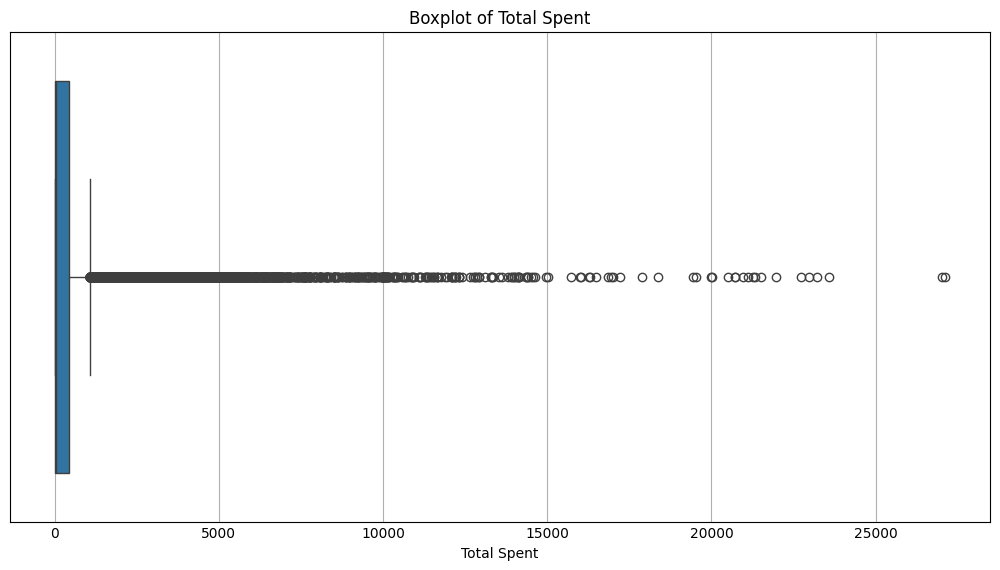

In [13]:
# Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['total_spent'])
plt.title('Boxplot of Total Spent')
plt.xlabel('Total Spent')
plt.show()


In [14]:
# Skewness
skewness = data['total_spent'].skew()
print(f'Skewness of Total Spent: {skewness}')

Skewness of Total Spent: 6.210447856078035


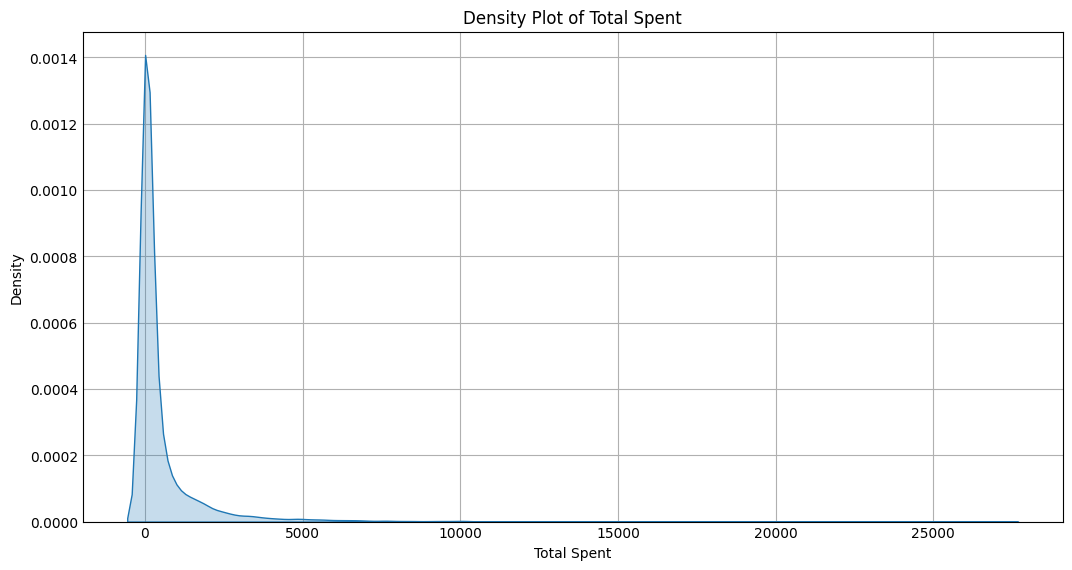

In [15]:
# Density Plot
plt.figure(figsize=(10, 5))
sns.kdeplot(data['total_spent'], shade=True)
plt.title('Density Plot of Total Spent')
plt.xlabel('Total Spent')
plt.ylabel('Density')
plt.show()

Z score method

In [16]:
from scipy import stats
import numpy as np
def count_outliers_zscore(data, column, threshold=3):
    z_scores = np.abs(stats.zscore(data[column]))
    outliers = np.where(z_scores > threshold)[0]
    return len(outliers)

# for total_spent
total_spent_outliers = count_outliers_zscore(data, 'total_spent')
print(f'Total spent outliers (Z-score): {total_spent_outliers}')

Total spent outliers (Z-score): 595


IQR method

In [17]:
def count_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers.shape[0]
# for total_spent
total_spent_outliers_iqr = count_outliers_iqr(data, 'total_spent')
print(f'Total spent outliers (IQR): {total_spent_outliers_iqr}')

Total spent outliers (IQR): 3936


In [18]:
from sklearn.ensemble import IsolationForest
def count_outliers_isolation_forest(data, column):
    iso_forest = IsolationForest(contamination=0.1, random_state=42)
    predictions = iso_forest.fit_predict(data[[column]])
    outliers = (predictions == -1).sum()
    return outliers
#  for total_spent
total_spent_outliers_iso = count_outliers_isolation_forest(data, 'total_spent')
print(f'Total spent outliers (Isolation Forest): {total_spent_outliers_iso}')


Total spent outliers (Isolation Forest): 2854


In [19]:
from sklearn.neighbors import LocalOutlierFactor
def count_outliers_lof(data, column):
    lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
    predictions = lof.fit_predict(data[[column]])
    outliers = (predictions == -1).sum()
    return outliers

#  for total_spent
total_spent_outliers_lof = count_outliers_lof(data, 'total_spent')
print(f'Total spent outliers (LOF): {total_spent_outliers_lof}')

Total spent outliers (LOF): 2854


In [20]:
from sklearn.ensemble import IsolationForest

def count_outliers_isolation_forest(data, column):
    iso_forest = IsolationForest(contamination=0.1, random_state=42)
    predictions = iso_forest.fit_predict(data[[column]])
    outliers = (predictions == -1).sum()
    return outliers

#  for total_spent
total_spent_outliers_iso = count_outliers_isolation_forest(data, 'total_spent')
print(f'Total spent outliers (Isolation Forest): {total_spent_outliers_iso}')

Total spent outliers (Isolation Forest): 2854


In [21]:
from sklearn.neighbors import LocalOutlierFactor
def count_outliers_lof(data, column):
    lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
    predictions = lof.fit_predict(data[[column]])
    outliers = (predictions == -1).sum()
    return outliers

# for total_spent
total_spent_outliers_lof = count_outliers_lof(data, 'total_spent')
print(f'Total spent outliers (LOF): {total_spent_outliers_lof}')

Total spent outliers (LOF): 2854


In [22]:
from sklearn.cluster import DBSCAN
import numpy as np
def count_outliers_dbscan(data, column, eps=0.5, min_samples=5):
    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db.fit_predict(data[[column]])
    # DBSCAN labels outliers as -1
    outliers = np.sum(labels == -1)
    return outliers

# for total_spent
total_spent_outliers_dbscan = count_outliers_dbscan(data, 'total_spent', eps=0.5, min_samples=5)
print(f'Total spent outliers (DBSCAN): {total_spent_outliers_dbscan}')

Total spent outliers (DBSCAN): 3858


In [24]:
def winsorize_series(series, lower_quantile=0.05, upper_quantile=0.95):
    lower_bound = series.quantile(lower_quantile)
    upper_bound = series.quantile(upper_quantile)
    return series.clip(lower_bound, upper_bound)

# Example for total_spent
data['total_spent_winsorized'] = winsorize_series(data['total_spent'])
print(data[['total_spent', 'total_spent_winsorized']].describe())
# Check the number of values changed by Winsorizing
outliers_winsorized = (data['total_spent'] != data['total_spent_winsorized']).sum()
print(f'Number of outliers adjusted by Winsorizing: {outliers_winsorized}')

        total_spent  total_spent_winsorized
count  28534.000000            28534.000000
mean     554.604671              411.873255
std     1460.307139              730.325287
min        0.000000                0.080000
25%        5.430000                5.430000
50%       53.285000               53.285000
75%      430.692500              430.692500
max    27125.360000             2695.521500
Number of outliers adjusted by Winsorizing: 2805


In [25]:
# Skewness
skewness = data['impressions'].skew()
print(f'Skewness of impressions: {skewness}')

Skewness of impressions: 9.707668562591975


In [26]:
# Get the highest value in the impressions column
max_impressions = data['impressions'].max()
print(f'The highest value in the impressions column is: {max_impressions}')

The highest value in the impressions column is: 196585


In [27]:
# Get the row with the highest value in the impressions column
max_impressions_row = data[data['impressions'] == max_impressions]
print('The row with the highest impressions value is:')
print(max_impressions_row)

The row with the highest impressions value is:
          dates                                campaign_name  \
2883 2024-03-21  USP_Marketing+MBA_New Leads Campaign_240224   

     campaign_start_date               creative_name  total_spent  \
2883                 NaT  USP_kavita&steffi_VideoAd6     14139.61   

      impressions  clicks  click_through_rate  leads  platform  \
2883       196585     712            0.362184   46.0  Facebook   

                            adset_name  total_spent_winsorized  
2883  Marketing+MBA All India - 240224               2695.5215  


In [28]:
# Get the highest value in the clicks column
max_clicks = data['clicks'].max()
print(f'The highest value in the clicks column is: {max_clicks}')

The highest value in the clicks column is: 3361


In [29]:
# Get the row with the highest value in the clicks column
max_clicks_row = data[data['clicks'] == max_clicks]
print('The row with the highest clicks value is:')
print(max_clicks_row)

The row with the highest clicks value is:
           dates                       campaign_name campaign_start_date  \
26761 2024-03-03  USP_Video_APTLTSKA_Lead-Gen_160224                 NaT   

      creative_name  total_spent  impressions  clicks  click_through_rate  \
26761      RG Video     10055.15       127907    3361              0.0263   

       leads platform                           adset_name  \
26761   12.0   Google  Combined_targeting_Generic_APTSTNKA   

       total_spent_winsorized  
26761               2695.5215  


In [30]:
# Get the highest value in the click_through_rate column
max_click_through_rate = data['click_through_rate'].max()
print(f'The highest value in the click_through_rate column is: {max_click_through_rate}')


The highest value in the click_through_rate column is: 200.0


In [31]:
# Get the row with the highest value in the click_through_rate column
max_click_through_rate_row = data[data['click_through_rate'] == max_click_through_rate]
print('The row with the highest click_through_rate value is:')
print(max_click_through_rate_row)

The row with the highest click_through_rate value is:
           dates                                      campaign_name  \
2714  2024-01-09      USP_Video_More_Volume_No Logic_India_New Link   
12690 2023-12-25  CBO - USP Masterclass Cold [ 15th Dec ] - More...   
21681 2024-01-25                            USP_2_Lead-gen-1_220124   
25104 2024-01-23    USP_Program_Higher Intent_No Logic_India_220124   
26863 2024-03-31                    USP Study Abroad_Generic_240224   

      campaign_start_date                                      creative_name  \
2714                  NaT                            USP_Influencer_videoAd1   
12690                 NaT  #5 ( Graphic ) - Get Master's Degree in Just 1...   
21681                 NaT         #3 ( Graphic ) - Worried About GMAT Score?   
25104                 NaT         #3 ( Graphic ) - Worried About GMAT Score?   
26863                 NaT                                       USP_S7_Stony   

       total_spent  impressions  click

In [32]:
# Get the highest value in the leads column
max_leads = data['leads'].max()
print(f'The highest value in the leads column is: {max_leads}')

The highest value in the leads column is: 153.0


In [33]:
# Get the row with the highest value in the leads column
max_leads_row = data[data['leads'] == max_leads]
print('The row with the highest leads value is:')
print(max_leads_row)

The row with the highest leads value is:
           dates                  campaign_name campaign_start_date  \
21531 2024-03-20  USP_MS + Coop Campaign_240224                 NaT   

           creative_name  total_spent  impressions  clicks  \
21531  USP_RIT_1_Getpaid      23219.6        95212     638   

       click_through_rate  leads  platform  \
21531            0.670084  153.0  Facebook   

                                adset_name  total_spent_winsorized  
21531  MS + Coop All India Ad set - 240224               2695.5215  


In [34]:
import pandas as pd

# Get the campaign name with the highest count
most_frequent_campaign = data['campaign_name'].value_counts().idxmax()
most_frequent_campaign_count = data['campaign_name'].value_counts().max()

print(f'The most frequently conducted campaign is: {most_frequent_campaign}')
print(f'The number of times it was conducted: {most_frequent_campaign_count}')

The most frequently conducted campaign is: USP Study Abroad_Generic_240224
The number of times it was conducted: 4583


In [35]:
# Get the highest value in the campaign_name column
max_campaign_name = data['campaign_name'].max()
print(f'The highest value in the campaign_name column is: {max_campaign_name}')

The highest value in the campaign_name column is: xCBO - USP Masterclass Cold [ 7th Dec ] - Higher Intent - No Logic -  new link India


In [36]:
# Get the row with the highest value in the campaign_name column
max_campaign_name_row = data[data['campaign_name'] == max_campaign_name]
print('The row with the highest campaign_name value is:')
print(max_campaign_name_row)

The row with the highest campaign_name value is:
           dates                                      campaign_name  \
8977  2023-12-08  xCBO - USP Masterclass Cold [ 7th Dec ] - High...   
12332 2023-12-07  xCBO - USP Masterclass Cold [ 7th Dec ] - High...   
12467 2023-12-08  xCBO - USP Masterclass Cold [ 7th Dec ] - High...   
12468 2023-12-08  xCBO - USP Masterclass Cold [ 7th Dec ] - High...   
12469 2023-12-07  xCBO - USP Masterclass Cold [ 7th Dec ] - High...   
...          ...                                                ...   
28308 2023-12-10  xCBO - USP Masterclass Cold [ 7th Dec ] - High...   
28323 2023-12-10  xCBO - USP Masterclass Cold [ 7th Dec ] - High...   
28397 2023-12-09  xCBO - USP Masterclass Cold [ 7th Dec ] - High...   
28398 2023-12-09  xCBO - USP Masterclass Cold [ 7th Dec ] - High...   
28410 2023-12-10  xCBO - USP Masterclass Cold [ 7th Dec ] - High...   

      campaign_start_date                                      creative_name  \
8977              

In [37]:
# Group by campaign_name and calculate summary statistics for total_spent
summary_stats = data.groupby('campaign_name')['total_spent'].describe()
print(summary_stats)

                                                     count         mean  \
campaign_name                                                             
CBO - USP Masterclass Cold [ 15th Dec ] - Highe...   515.0   362.525204   
CBO - USP Masterclass Cold [ 15th Dec ] - More ...   800.0   171.041387   
CBO - USP Masterclass Cold [ 23rd Nov ] - Highe...  1777.0   110.441964   
CBO - USP Masterclass Cold [ 23rd Nov ] - More ...   898.0   283.244053   
USP Masterclass Cold [ 14th Dec ] - Link Click Ad     80.0   130.656875   
USP Masterclass Cold [ 23rd Nov ] - More volume...   587.0   209.314395   
USP Masterclass Cold [ 31st Oct ] - Higher Inte...  1853.0   110.978408   
USP Masterclass Cold [ 31st Oct ] - More Volume...   793.0   137.596015   
USP Masterclass Cold [ 31st Oct ] - More volume...   830.0   111.429181   
USP Study Abroad_Generic_240224                     4583.0   464.037582   
USP_2_Lead-gen-1_220124                             1274.0   380.509152   
USP_2_Lead-gen-2_Top4-sta

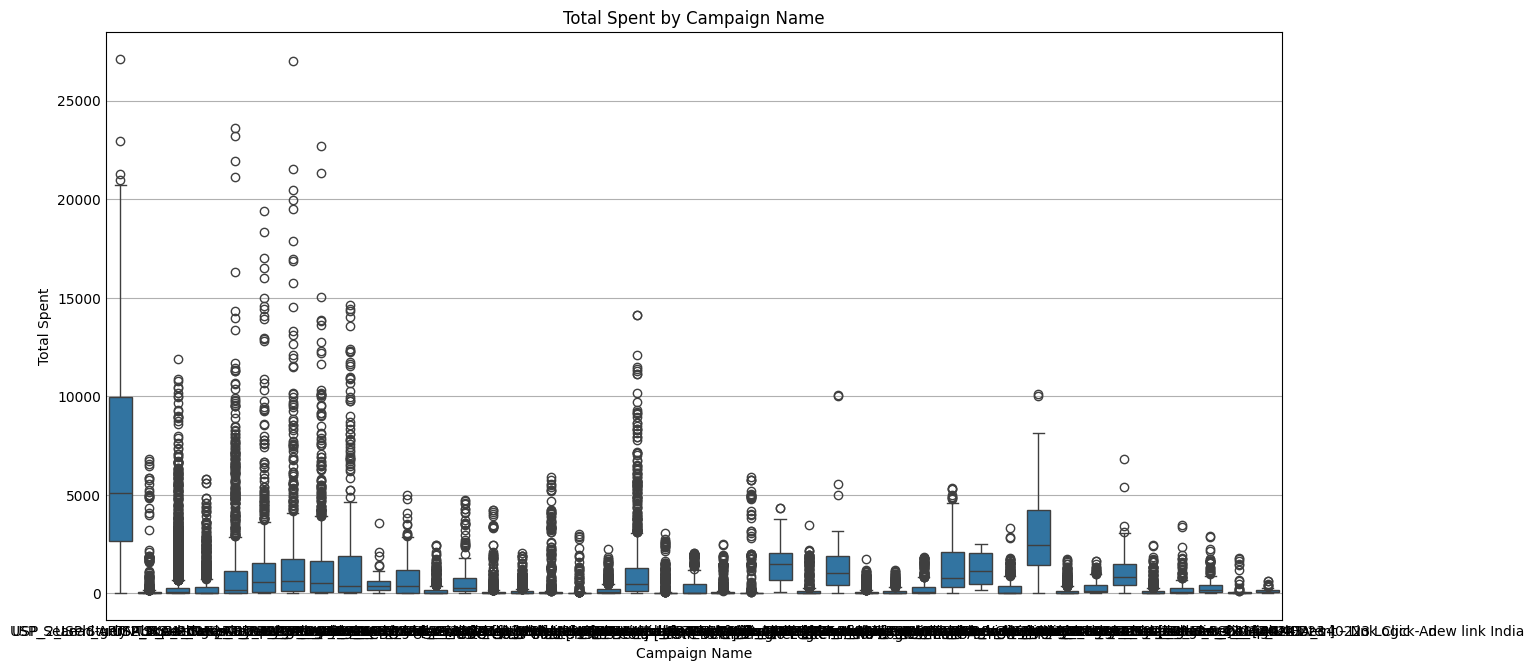

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(x='campaign_name', y='total_spent', data=data)
plt.title('Total Spent by Campaign Name')
plt.xlabel('Campaign Name')
plt.ylabel('Total Spent')
plt.show()

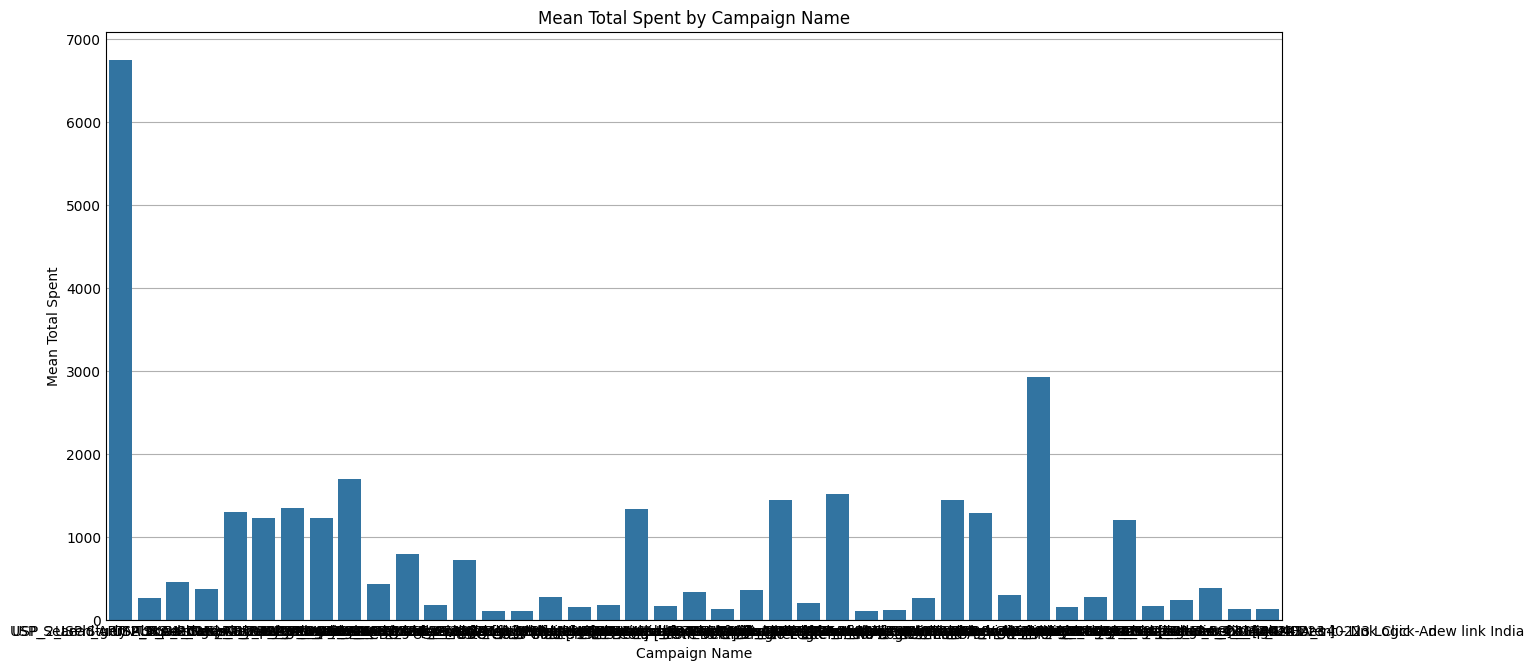

In [39]:
plt.figure(figsize=(12, 6))
sns.barplot(x='campaign_name', y='total_spent', data=data, estimator=np.mean, ci=None)
plt.title('Mean Total Spent by Campaign Name')
plt.xlabel('Campaign Name')
plt.ylabel('Mean Total Spent')
plt.show()

In [40]:
import scipy.stats as stats
# Performing ANOVA
anova_result = stats.f_oneway(*[data[data['campaign_name'] == campaign]['total_spent'] for campaign in data['campaign_name'].unique()])
print('ANOVA result:', anova_result)

ANOVA result: F_onewayResult(statistic=159.95489835473268, pvalue=0.0)


<Figure size 1200x800 with 0 Axes>

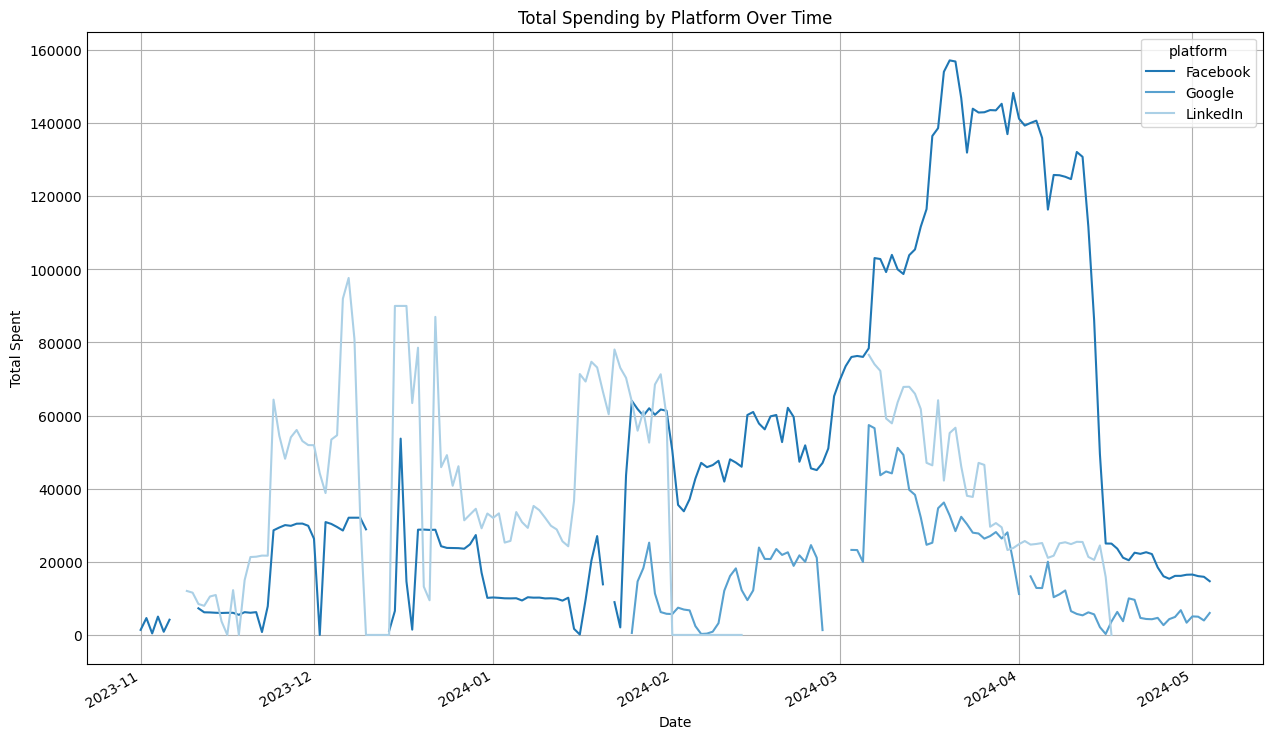

In [11]:
# @title Total Spending by Platform Over Time

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
df.groupby(['dates', 'platform'])['total_spent'].sum().unstack().plot(kind='line',figsize=(12, 8))
plt.xlabel('Date')
plt.ylabel('Total Spent')
_ = plt.title('Total Spending by Platform Over Time')

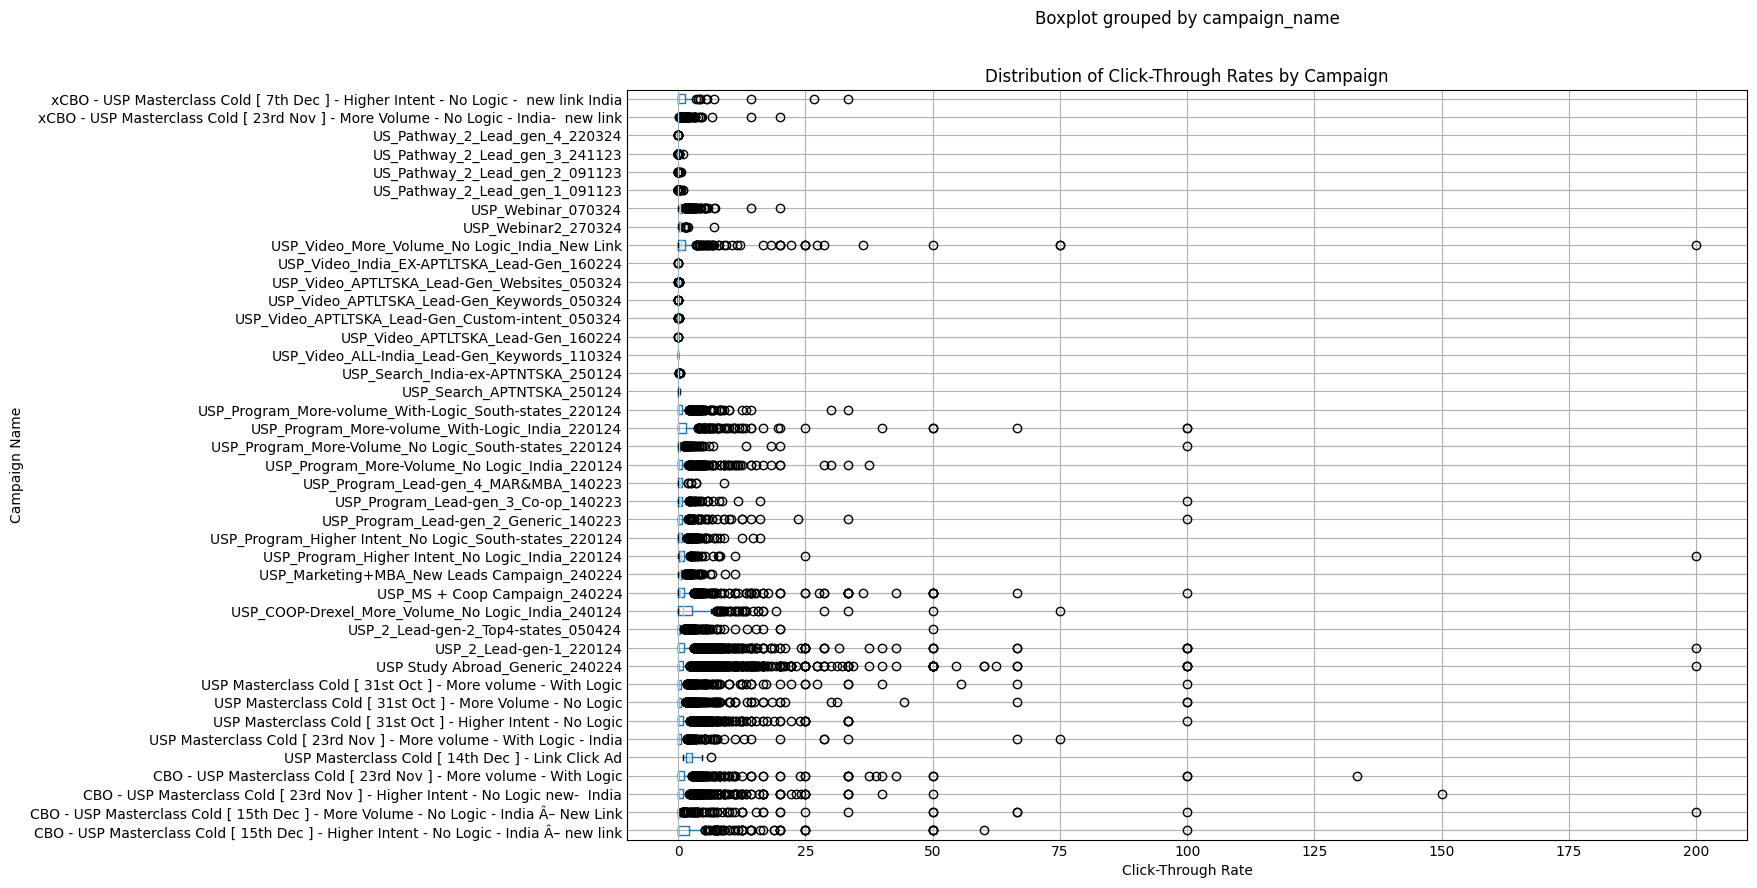

In [12]:
# @title Distribution of Click-Through Rates by Campaign

import matplotlib.pyplot as plt

df.boxplot(column='click_through_rate', by='campaign_name', vert=False, figsize=(14, 10))
plt.xlabel('Click-Through Rate')
plt.ylabel('Campaign Name')
_ = plt.title('Distribution of Click-Through Rates by Campaign')

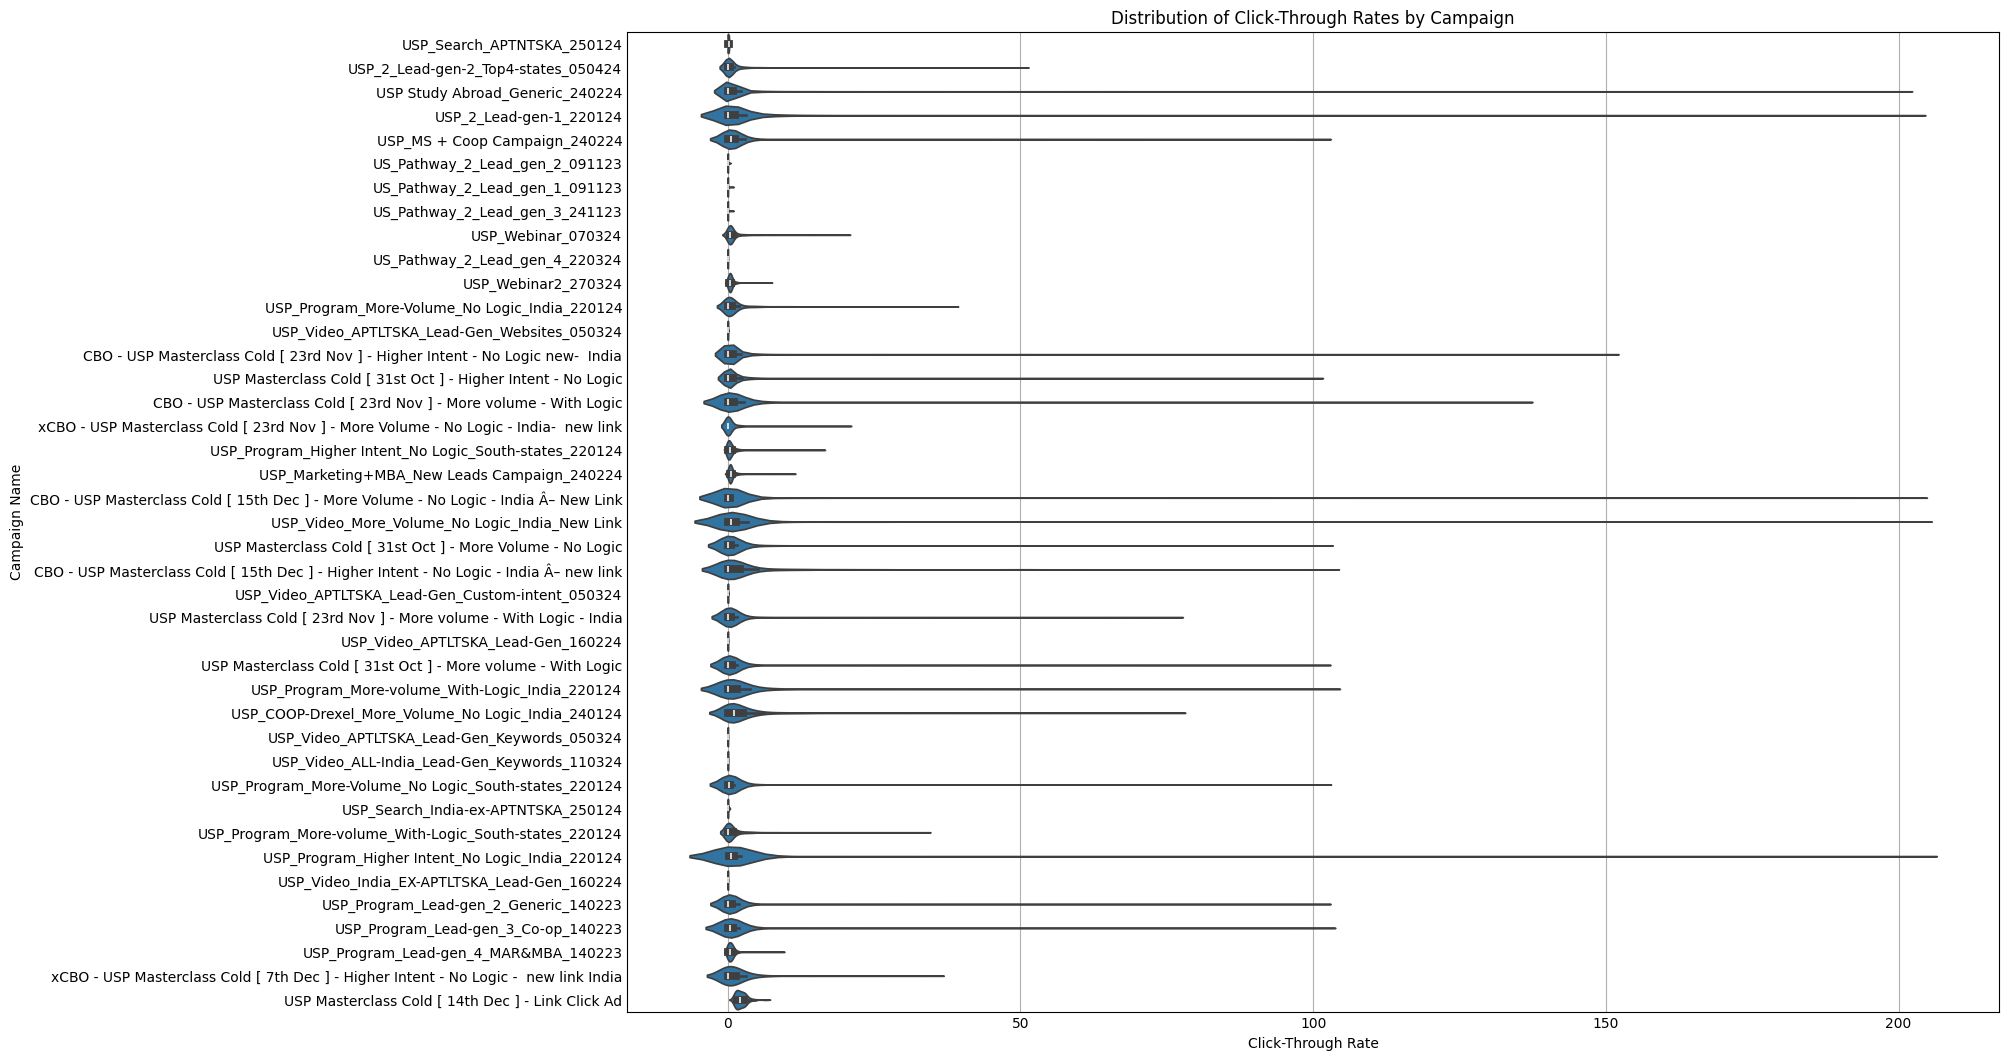

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and it has the columns 'click_through_rate' and 'campaign_name'
plt.figure(figsize=(14, 10))
sns.violinplot(data=df, x='click_through_rate', y='campaign_name', inner='box', scale='width')
plt.xlabel('Click-Through Rate')
plt.ylabel('Campaign Name')
plt.title('Distribution of Click-Through Rates by Campaign')
plt.show()

In [15]:
# Group by 'campaign_name' and count unique 'creative_name'
campaign_creative_counts = df.groupby('campaign_name')['creative_name'].nunique()

# Print the result
print(campaign_creative_counts)
#how many unique creative names were present in a campaign(count)

campaign_name
CBO - USP Masterclass Cold [ 15th Dec ] - Higher Intent - No Logic - India Â– new link    17
CBO - USP Masterclass Cold [ 15th Dec ] - More Volume - No Logic - India Â– New Link      10
CBO - USP Masterclass Cold [ 23rd Nov ] - Higher Intent - No Logic new-  India            15
CBO - USP Masterclass Cold [ 23rd Nov ] - More volume - With Logic                        12
USP Masterclass Cold [ 14th Dec ] - Link Click Ad                                         10
USP Masterclass Cold [ 23rd Nov ] - More volume - With Logic - India                      10
USP Masterclass Cold [ 31st Oct ] - Higher Intent - No Logic                              10
USP Masterclass Cold [ 31st Oct ] - More Volume - No Logic                                11
USP Masterclass Cold [ 31st Oct ] - More volume - With Logic                              10
USP Study Abroad_Generic_240224                                                           34
USP_2_Lead-gen-1_220124                                 

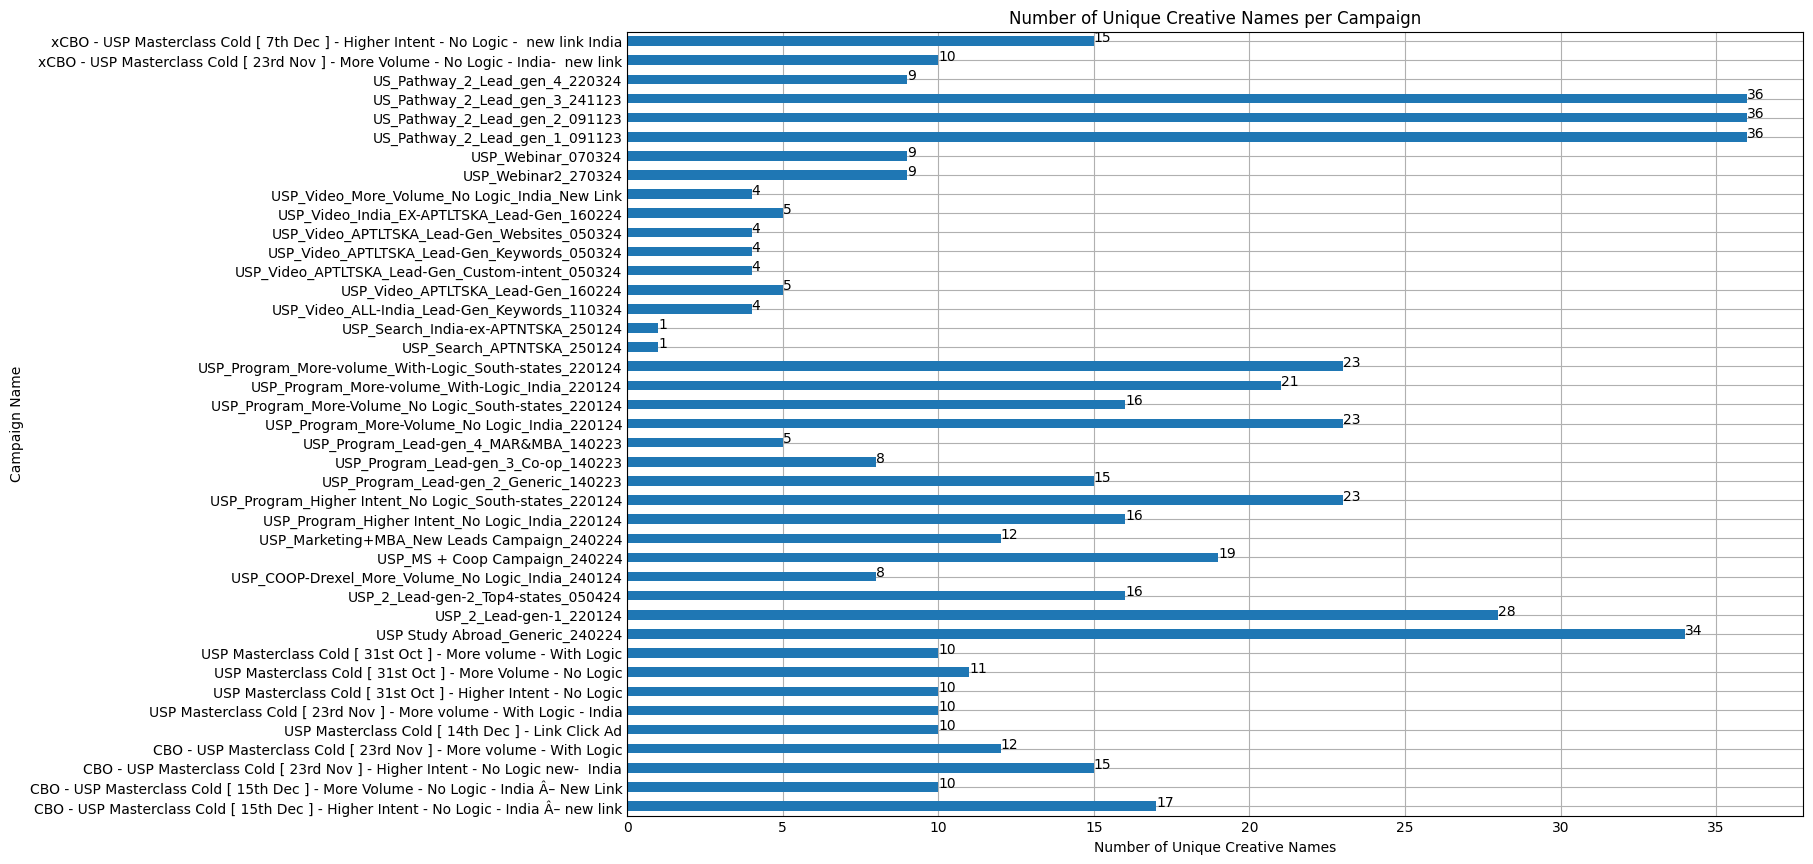

In [54]:
# Group by 'campaign_name' and count unique 'creative_name'
campaign_creative_counts = df.groupby('campaign_name')['creative_name'].nunique()

# Plot the result as a horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 8))
campaign_creative_counts.plot(kind='barh', ax=ax)
ax.set_xlabel('Number of Unique Creative Names')
ax.set_ylabel('Campaign Name')
ax.set_title('Number of Unique Creative Names per Campaign')

# Add annotations to the bars
for index, value in enumerate(campaign_creative_counts):
    ax.text(value, index, str(value))

plt.show()

                                        campaign_name  total_spent
9                     USP Study Abroad_Generic_240224   2126684.24
35                     US_Pathway_2_Lead_gen_1_091123   1884063.88
37                     US_Pathway_2_Lead_gen_3_241123   1749087.89
13                      USP_MS + Coop Campaign_240224   1501040.54
36                     US_Pathway_2_Lead_gen_2_091123   1469168.59
14        USP_Marketing+MBA_New Leads Campaign_240224   1125425.52
24                         USP_Search_APTNTSKA_250124    789571.12
34                                 USP_Webinar_070324    752657.01
10                            USP_2_Lead-gen-1_220124    484768.66
3   CBO - USP Masterclass Cold [ 23rd Nov ] - More...    254353.16
6   USP Masterclass Cold [ 31st Oct ] - Higher Int...    205642.99
25                USP_Search_India-ex-APTNTSKA_250124    199442.83
32      USP_Video_More_Volume_No Logic_India_New Link    198416.23
2   CBO - USP Masterclass Cold [ 23rd Nov ] - High...    19625

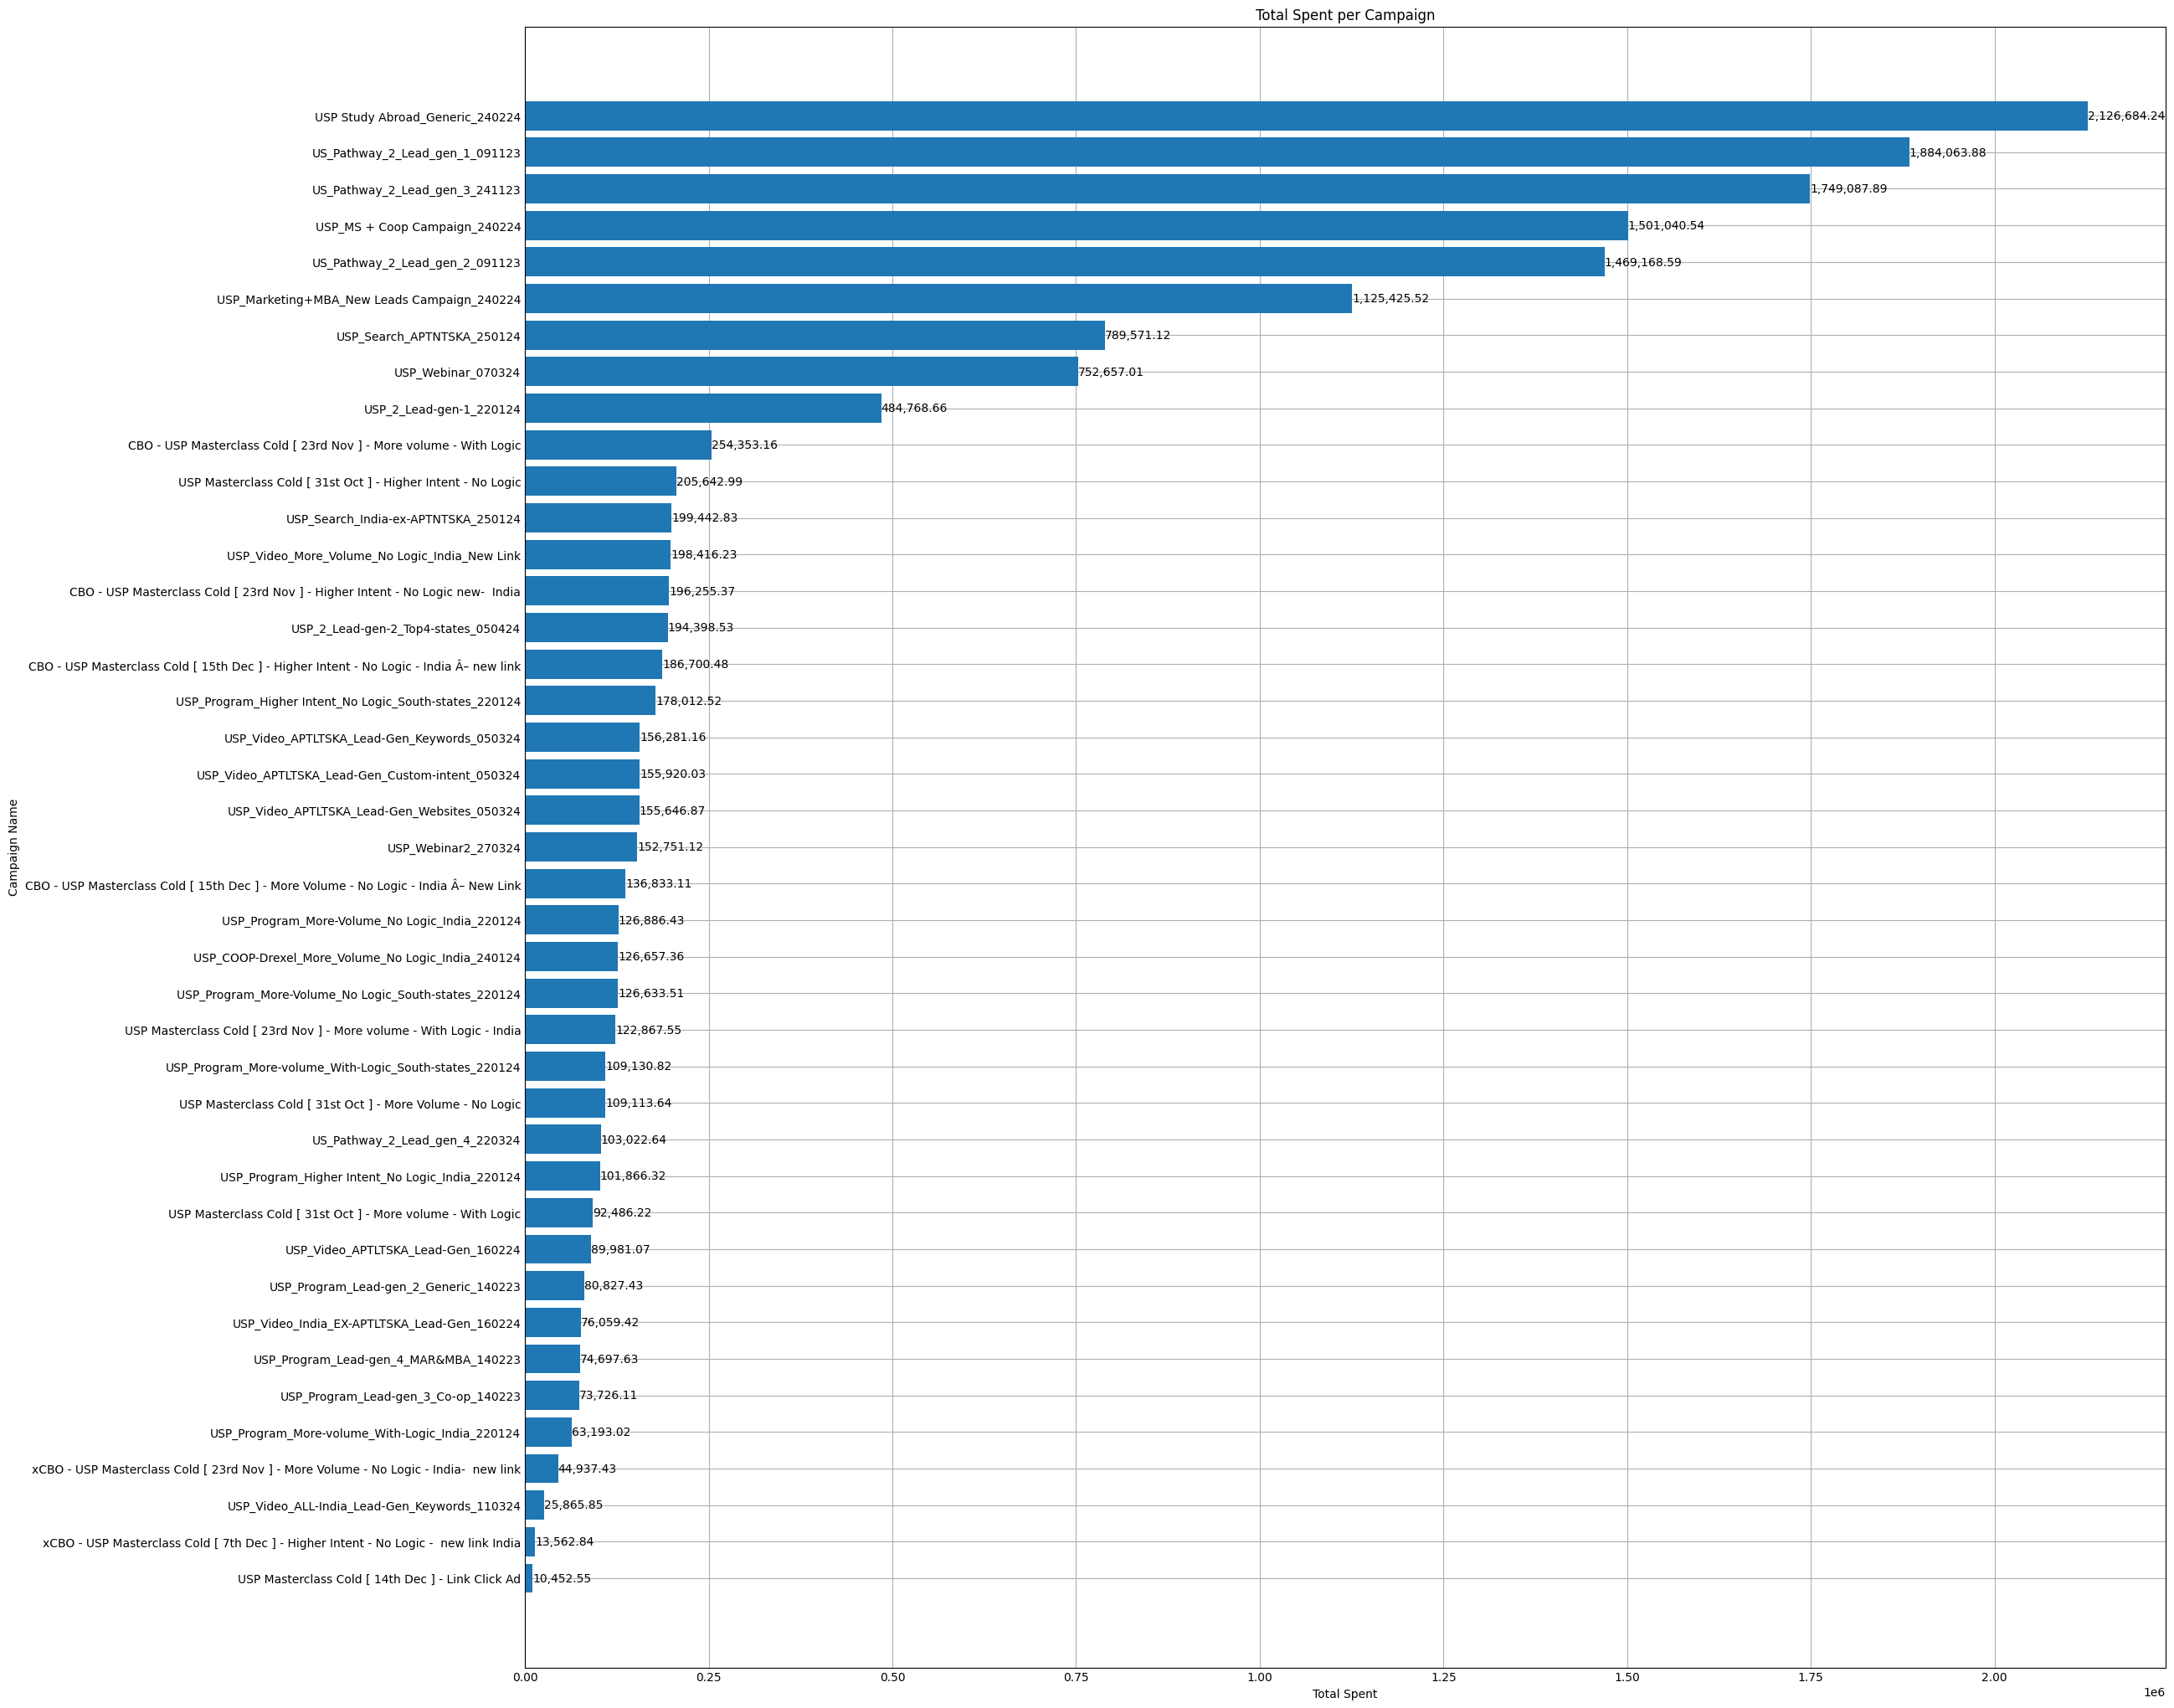

In [20]:
# Group by 'campaign_name' and sum 'total_spent'
campaign_total_spent = df.groupby('campaign_name')['total_spent'].sum().reset_index()

# Sort the DataFrame in descending order based on 'total_spent'
campaign_total_spent = campaign_total_spent.sort_values(by='total_spent', ascending=False)

# Print the result
print(campaign_total_spent)

# Plot the result as a horizontal bar chart
plt.figure(figsize=(20, 20))
ax = plt.gca()
bars = plt.barh(campaign_total_spent['campaign_name'], campaign_total_spent['total_spent'])
plt.xlabel('Total Spent')
plt.ylabel('Campaign Name')
plt.title('Total Spent per Campaign')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top

# Add annotations to the bars
for bar in bars:
    ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():,.2f}',
            va='center', ha='left', color='black')

plt.show()


                                        campaign_name  impressions
9                     USP Study Abroad_Generic_240224      9265548
14        USP_Marketing+MBA_New Leads Campaign_240224      8106285
37                     US_Pathway_2_Lead_gen_3_241123      6317435
35                     US_Pathway_2_Lead_gen_1_091123      5751255
13                      USP_MS + Coop Campaign_240224      4506382
36                     US_Pathway_2_Lead_gen_2_091123      4225764
34                                 USP_Webinar_070324      4125312
31        USP_Video_India_EX-APTLTSKA_Lead-Gen_160224      2302262
10                            USP_2_Lead-gen-1_220124      1668181
27                 USP_Video_APTLTSKA_Lead-Gen_160224      1546844
1   CBO - USP Masterclass Cold [ 15th Dec ] - More...      1302917
32      USP_Video_More_Volume_No Logic_India_New Link      1246514
30        USP_Video_APTLTSKA_Lead-Gen_Websites_050324      1226818
28   USP_Video_APTLTSKA_Lead-Gen_Custom-intent_050324      122

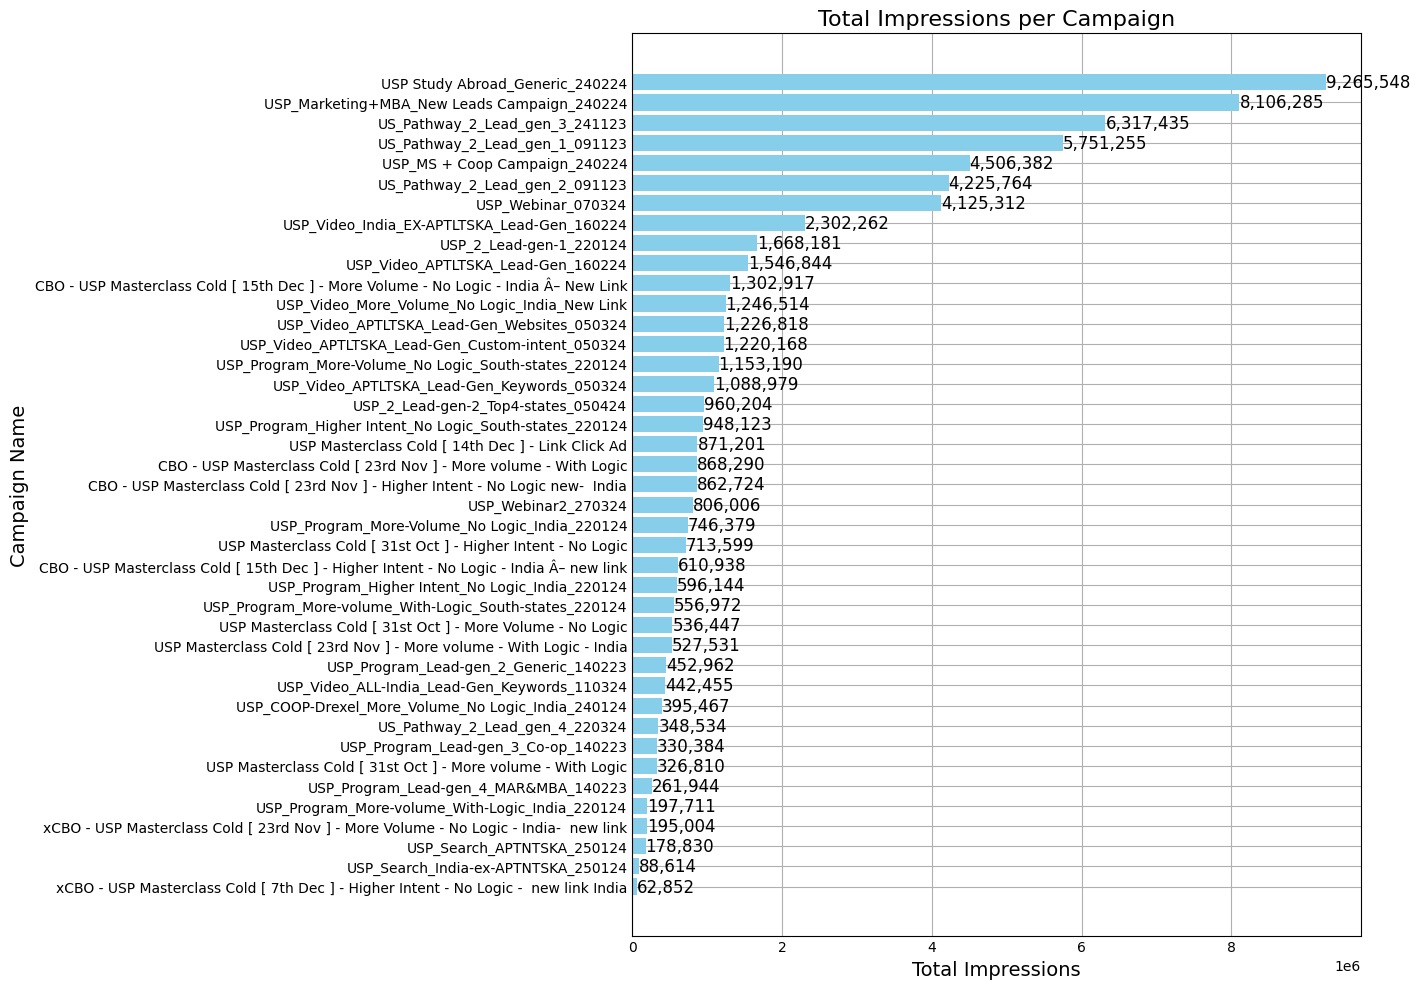

In [22]:
# Group by 'campaign_name' and sum 'impressions'
campaign_impressions = df.groupby('campaign_name')['impressions'].sum().reset_index()

# Sort the DataFrame in descending order based on 'impressions'
campaign_impressions = campaign_impressions.sort_values(by='impressions', ascending=False)

# Print the result
print(campaign_impressions)
# Display the result
print("Total Impressions per Campaign:")
for index, row in campaign_impressions.iterrows():
    print(f"Campaign Name: {row['campaign_name']}, Total Impressions: {row['impressions']:,.0f}")


# Plot the result as a horizontal bar chart with annotations
plt.figure(figsize=(14, 10))
ax = plt.gca()
bars = plt.barh(campaign_impressions['campaign_name'], campaign_impressions['impressions'], color='skyblue')
plt.xlabel('Total Impressions', fontsize=14)
plt.ylabel('Campaign Name', fontsize=14)
plt.title('Total Impressions per Campaign', fontsize=16)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top

# Add annotations to the bars
for bar in bars:
    ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():,.0f}',
            va='center', ha='left', color='black', fontsize=12)

# Adjust layout to fit the campaign names
plt.tight_layout()
plt.show()

                                        campaign_name  clicks
0   CBO - USP Masterclass Cold [ 15th Dec ] - High...   12853
1   CBO - USP Masterclass Cold [ 15th Dec ] - More...    5505
2   CBO - USP Masterclass Cold [ 23rd Nov ] - High...    9469
3   CBO - USP Masterclass Cold [ 23rd Nov ] - More...   11100
4   USP Masterclass Cold [ 14th Dec ] - Link Click Ad   18578
5   USP Masterclass Cold [ 23rd Nov ] - More volum...    4542
6   USP Masterclass Cold [ 31st Oct ] - Higher Int...    7516
7   USP Masterclass Cold [ 31st Oct ] - More Volum...    4884
8   USP Masterclass Cold [ 31st Oct ] - More volum...    2939
9                     USP Study Abroad_Generic_240224   48531
10                            USP_2_Lead-gen-1_220124   10480
11                USP_2_Lead-gen-2_Top4-states_050424    3933
12  USP_COOP-Drexel_More_Volume_No Logic_India_240124    5238
13                      USP_MS + Coop Campaign_240224   27762
14        USP_Marketing+MBA_New Leads Campaign_240224   37727
15    US

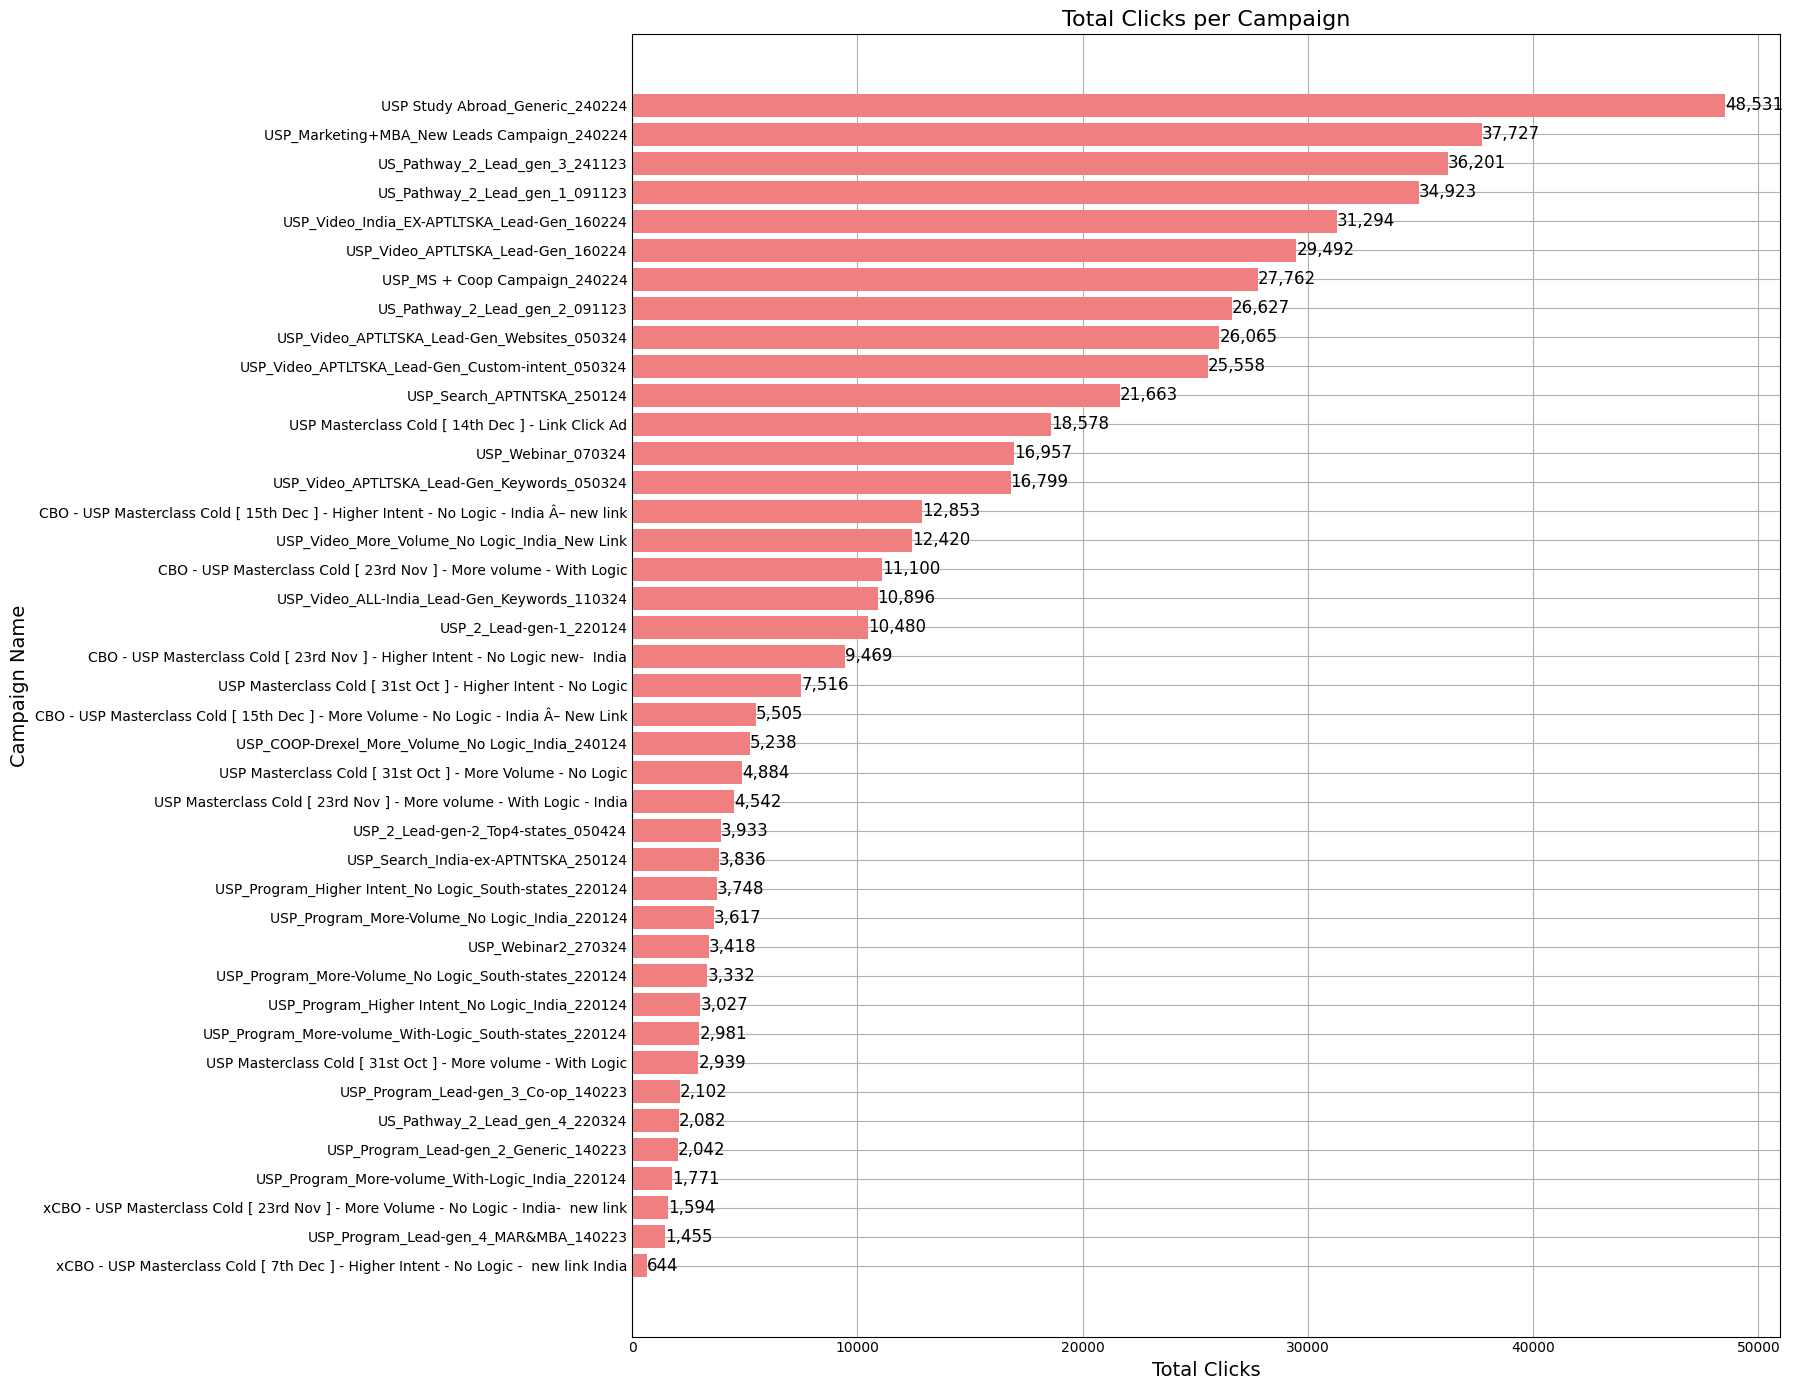

In [26]:
# Group by 'campaign_name' and sum 'clicks'
campaign_clicks = df.groupby('campaign_name')['clicks'].sum().reset_index()
# Print the result
print(campaign_clicks)

# Sort the DataFrame in descending order based on 'clicks'
campaign_clicks = campaign_clicks.sort_values(by='clicks', ascending=False)
# Display the result
print("Total Impressions per Campaign:")
for index, row in campaign_impressions.iterrows():
    print(f"Campaign Name: {row['campaign_name']}, Total Impressions: {row['impressions']:,.0f}")


# Plot the result as a horizontal bar chart with annotations
plt.figure(figsize=(18, 14))
ax = plt.gca()
bars = plt.barh(campaign_clicks['campaign_name'], campaign_clicks['clicks'], color='lightcoral')
plt.xlabel('Total Clicks', fontsize=14)
plt.ylabel('Campaign Name', fontsize=14)
plt.title('Total Clicks per Campaign', fontsize=16)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top

# Add annotations to the bars
for bar in bars:
    ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():,.0f}',
            va='center', ha='left', color='black', fontsize=12)

plt.tight_layout()
plt.show()

In [27]:
# Calculate click_through_rate where it is missing and both clicks and impressions are available
missing_ctr_mask = df['click_through_rate'].isna() & df['clicks'].notna() & df['impressions'].notna()

# Perform the calculation
df.loc[missing_ctr_mask, 'click_through_rate'] = df.loc[missing_ctr_mask, 'clicks'] / df.loc[missing_ctr_mask, 'impressions']

# Display the updated DataFrame to check the changes
print(df)

           dates                        campaign_name campaign_start_date  \
0     2024-04-29           USP_Search_APTNTSKA_250124          25-01-2024   
1     2024-05-02  USP_2_Lead-gen-2_Top4-states_050424          05-04-2024   
2     2024-05-02  USP_2_Lead-gen-2_Top4-states_050424          05-04-2024   
3     2024-05-02  USP_2_Lead-gen-2_Top4-states_050424          05-04-2024   
4     2024-05-02  USP_2_Lead-gen-2_Top4-states_050424          05-04-2024   
...          ...                                  ...                 ...   
28529 2024-03-12        USP_MS + Coop Campaign_240224          24-02-2024   
28530 2024-03-12        USP_MS + Coop Campaign_240224          24-02-2024   
28531 2024-03-12      USP Study Abroad_Generic_240224          24-02-2024   
28532 2024-03-12      USP Study Abroad_Generic_240224          24-02-2024   
28533 2024-03-12      USP Study Abroad_Generic_240224          24-02-2024   

                           creative_name  total_spent  impressions  clicks 

Total Leads per Campaign:
                                        campaign_name    leads
9                     USP Study Abroad_Generic_240224  4630.00
13                      USP_MS + Coop Campaign_240224  4446.00
14        USP_Marketing+MBA_New Leads Campaign_240224  2390.00
10                            USP_2_Lead-gen-1_220124  2124.00
32      USP_Video_More_Volume_No Logic_India_New Link  1866.00
34                                 USP_Webinar_070324  1616.00
24                         USP_Search_APTNTSKA_250124  1360.00
0   CBO - USP Masterclass Cold [ 15th Dec ] - High...  1346.00
35                     US_Pathway_2_Lead_gen_1_091123  1232.00
12  USP_COOP-Drexel_More_Volume_No Logic_India_240124  1096.00
2   CBO - USP Masterclass Cold [ 23rd Nov ] - High...  1093.00
6   USP Masterclass Cold [ 31st Oct ] - Higher Int...   888.00
37                     US_Pathway_2_Lead_gen_3_241123   874.00
3   CBO - USP Masterclass Cold [ 23rd Nov ] - More...   731.00
36                     US_Pat

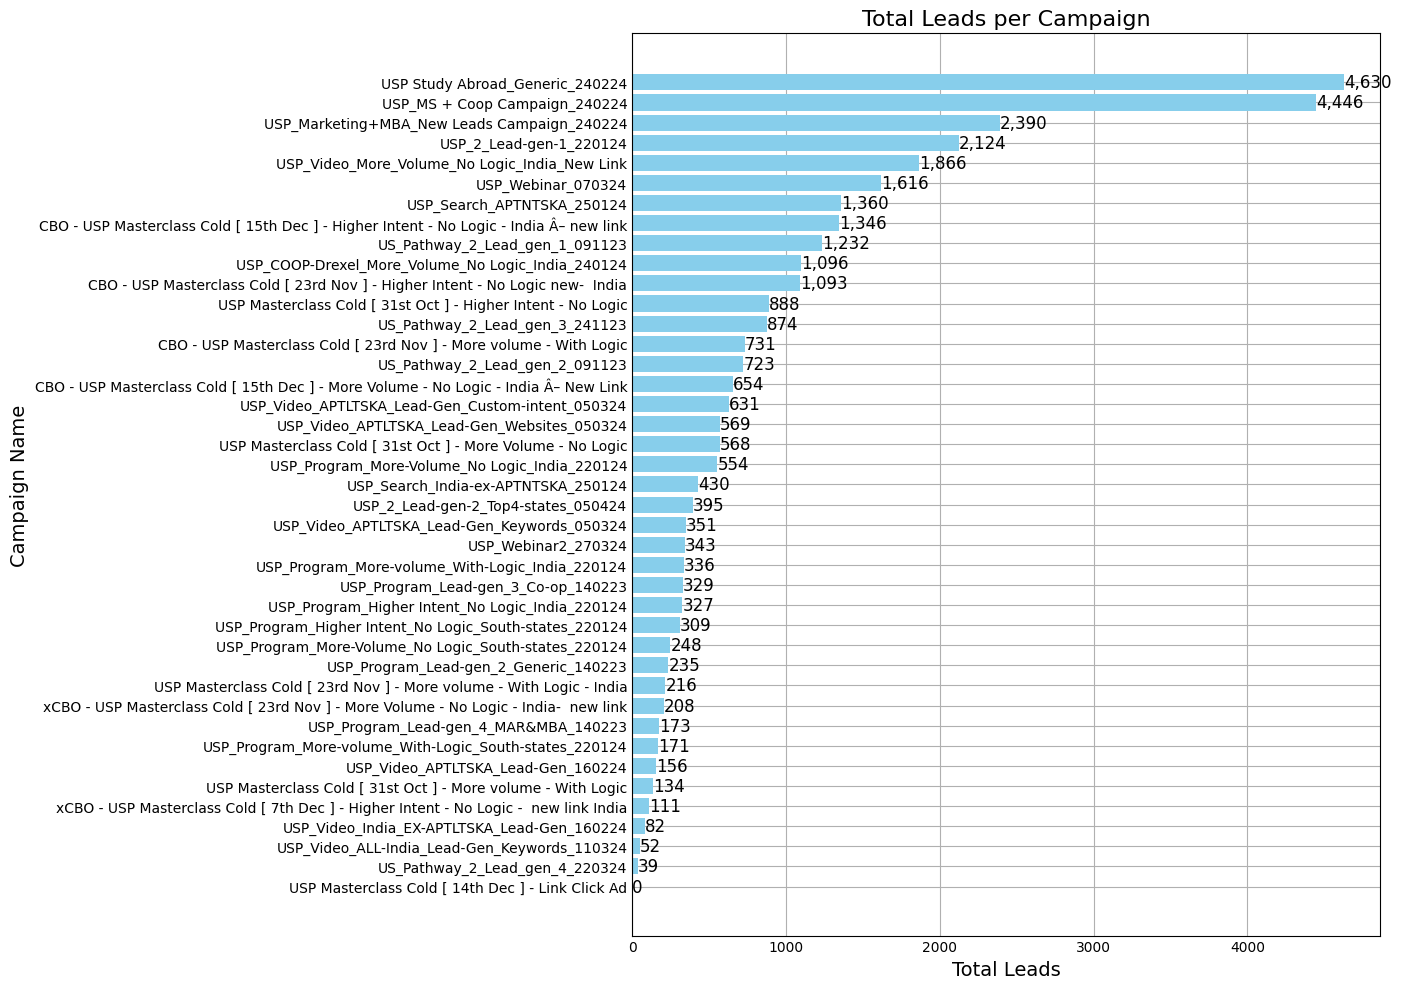

In [28]:
# Group by 'campaign_name' and sum 'leads'
campaign_leads = df.groupby('campaign_name')['leads'].sum().reset_index()

# Sort the DataFrame in descending order based on 'leads'
campaign_leads = campaign_leads.sort_values(by='leads', ascending=False)

# Print the result
print("Total Leads per Campaign:")
print(campaign_leads)

# Display the result as a text output
for index, row in campaign_leads.iterrows():
    print(f"Campaign Name: {row['campaign_name']}, Total Leads: {row['leads']}")

import matplotlib.pyplot as plt

# Plot the result as a horizontal bar chart with annotations
plt.figure(figsize=(14, 10))
ax = plt.gca()
bars = plt.barh(campaign_leads['campaign_name'], campaign_leads['leads'], color='skyblue')
plt.xlabel('Total Leads', fontsize=14)
plt.ylabel('Campaign Name', fontsize=14)
plt.title('Total Leads per Campaign', fontsize=16)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top

# Add annotations to the bars
for bar in bars:
    ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():,.0f}',
            va='center', ha='left', color='black', fontsize=12)

plt.tight_layout()
plt.show()


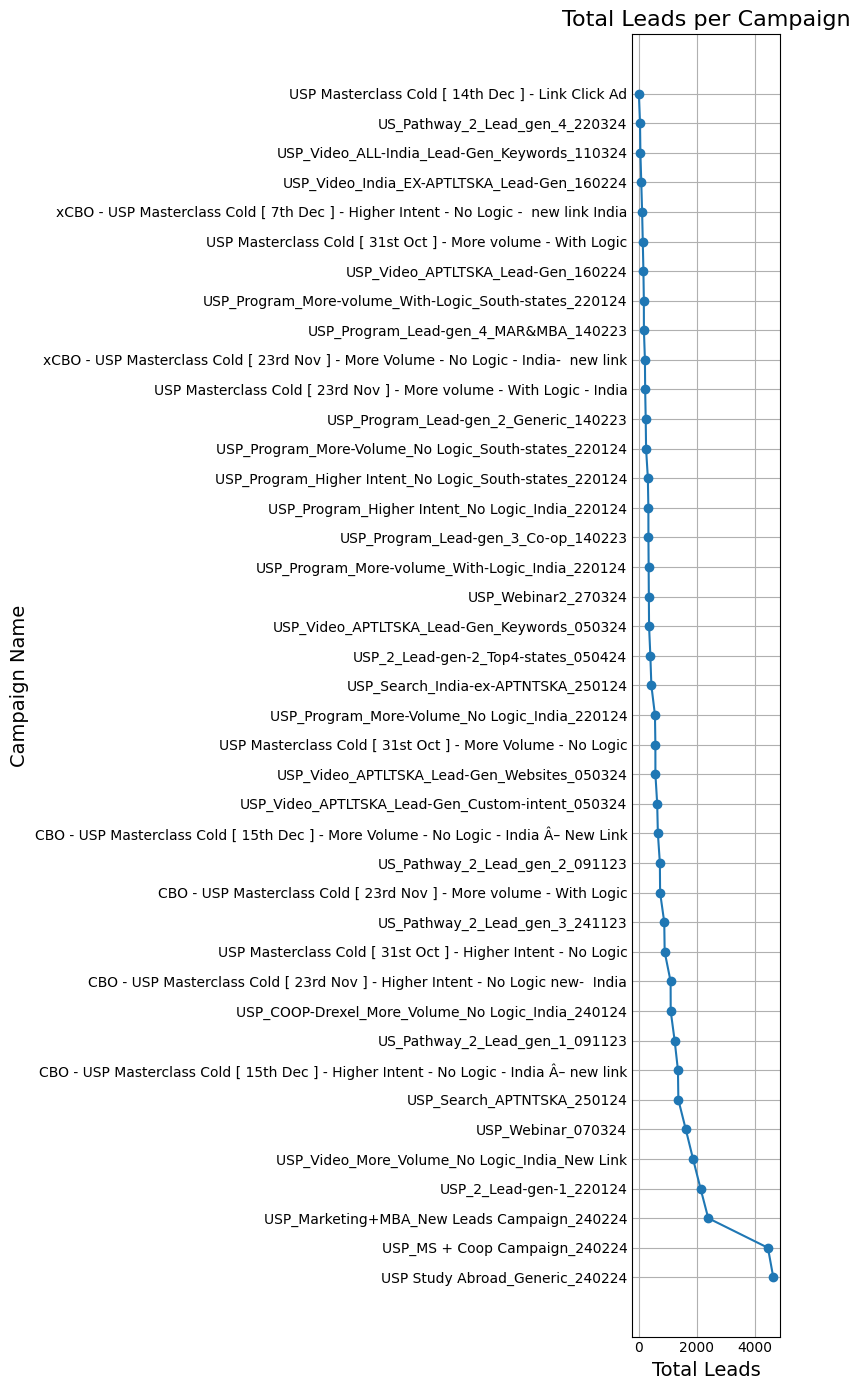

In [29]:
import matplotlib.pyplot as plt

# Plot the result as a line chart with vertical orientation
plt.figure(figsize=(8, 14))
plt.plot(campaign_leads['leads'], campaign_leads['campaign_name'], marker='o')
plt.ylabel('Campaign Name', fontsize=14)
plt.xlabel('Total Leads', fontsize=14)
plt.title('Total Leads per Campaign', fontsize=16)
plt.yticks(rotation=0)  # Ensure y-axis labels are readable
plt.grid(True)
plt.tight_layout()
plt.show()

In [31]:
# Count the number of campaigns per platform
campaign_counts = df['platform'].value_counts()

print("Campaign counts per platform:")
print(campaign_counts)

Campaign counts per platform:
platform
Facebook    23530
LinkedIn     4247
Google        757
Name: count, dtype: int64


In [33]:
# Group by platform and summarize metrics
summary = df.groupby('platform').agg({
    'impressions': 'sum',
    'clicks': 'sum'
}).reset_index()

# Calculate additional metrics like Click Through Rate (CTR)
summary['CTR'] = (summary['clicks'] / summary['impressions']) * 100

print("Summary by platform:")
print(summary)

Summary by platform:
   platform  impressions  clicks       CTR
0  Facebook     43202021  270165  0.625353
1    Google      8094970  165603  2.045752
2  LinkedIn     16642988   99833  0.599850


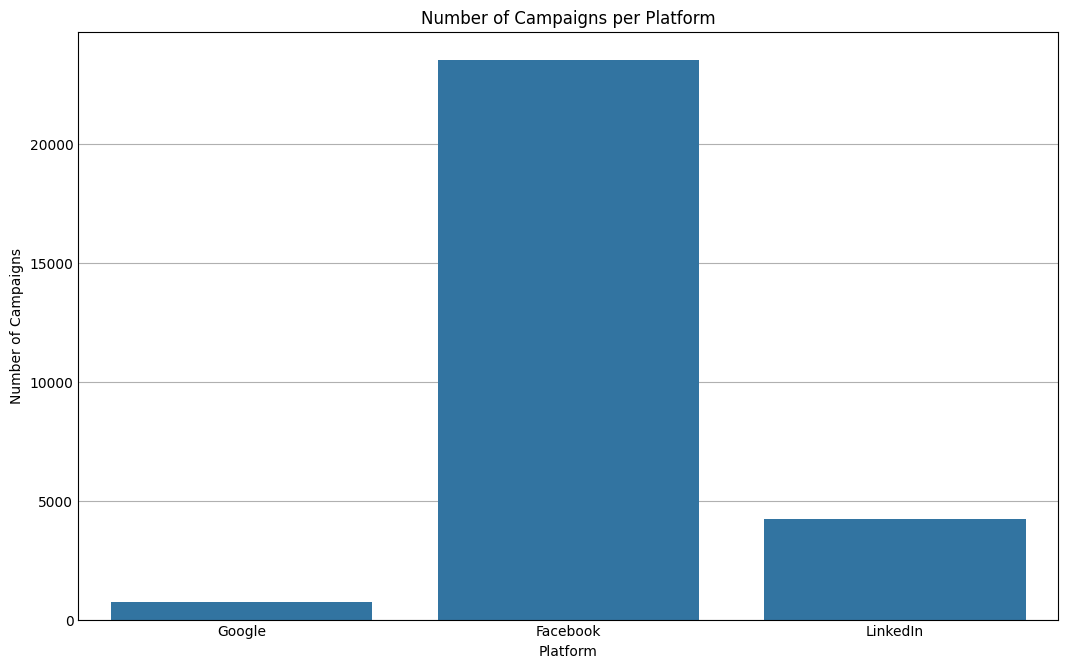

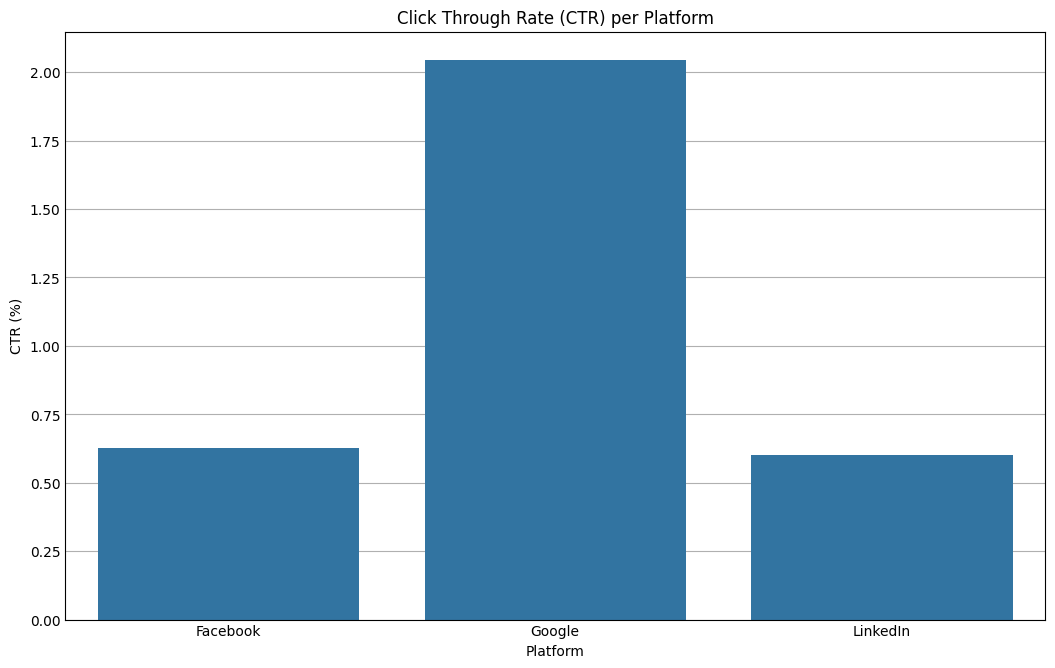

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the number of campaigns per platform
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='platform')
plt.title('Number of Campaigns per Platform')
plt.xlabel('Platform')
plt.ylabel('Number of Campaigns')
plt.show()

# Plot Click Through Rate (CTR) per platform
plt.figure(figsize=(10, 6))
sns.barplot(data=summary, x='platform', y='CTR')
plt.title('Click Through Rate (CTR) per Platform')
plt.xlabel('Platform')
plt.ylabel('CTR (%)')
plt.show()

In [36]:
# Count the number of campaigns of each type per platform
campaign_type_counts = df.groupby(['platform', 'campaign_name']).size().unstack(fill_value=0)

print("Number of campaigns of each type per platform:")
print(campaign_type_counts)

Number of campaigns of each type per platform:
campaign_name  CBO - USP Masterclass Cold [ 15th Dec ] - Higher Intent - No Logic - India Â– new link  \
platform                                                                                                
Facebook                                                     515                                        
Google                                                         0                                        
LinkedIn                                                       0                                        

campaign_name  CBO - USP Masterclass Cold [ 15th Dec ] - More Volume - No Logic - India Â– New Link  \
platform                                                                                              
Facebook                                                     800                                      
Google                                                         0                                      
LinkedIn       

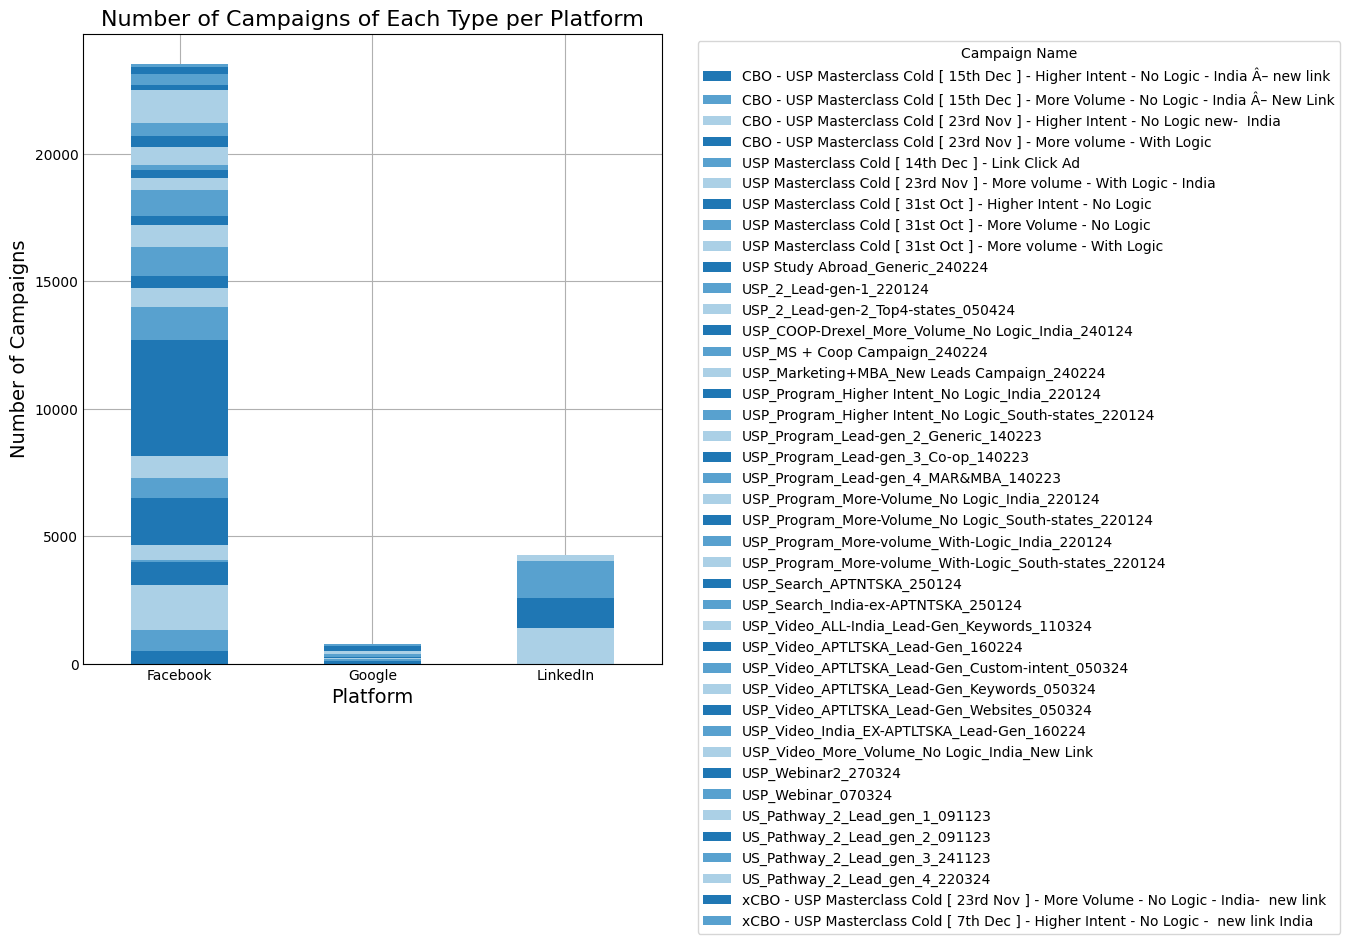

In [37]:
import matplotlib.pyplot as plt

# Count the number of campaigns of each type per platform
campaign_type_counts = df.groupby(['platform', 'campaign_name']).size().unstack(fill_value=0)

# Plot the stacked bar chart
campaign_type_counts.plot(kind='bar', stacked=True, figsize=(14, 8))

plt.xlabel('Platform', fontsize=14)
plt.ylabel('Number of Campaigns', fontsize=14)
plt.title('Number of Campaigns of Each Type per Platform', fontsize=16)
plt.legend(title='Campaign Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.tight_layout()
plt.show()


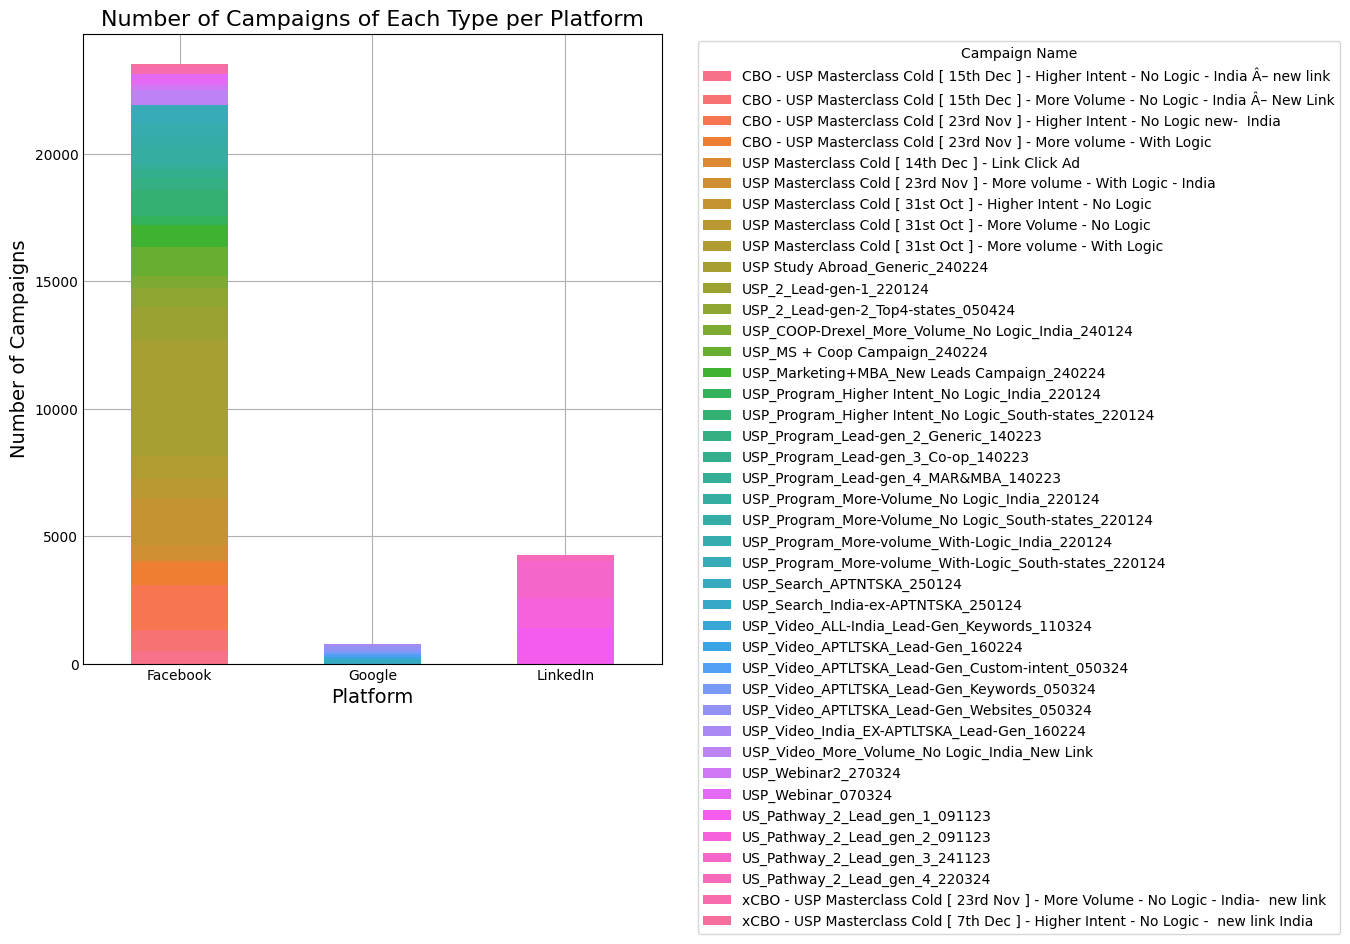

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of campaigns of each type per platform
campaign_type_counts = df.groupby(['platform', 'campaign_name']).size().unstack(fill_value=0)

# Set a color palette with enough colors for all campaigns
num_campaigns = len(campaign_type_counts.columns)
colors = sns.color_palette("husl", num_campaigns)

# Plot the stacked bar chart with custom colors
ax = campaign_type_counts.plot(kind='bar', stacked=True, figsize=(14, 8), color=colors)

plt.xlabel('Platform', fontsize=14)
plt.ylabel('Number of Campaigns', fontsize=14)
plt.title('Number of Campaigns of Each Type per Platform', fontsize=16)
plt.legend(title='Campaign Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.tight_layout()
plt.show()


In [39]:
import pandas as pd

# Adjust display options to show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Count the number of campaigns of each type per platform
campaign_type_counts = df.groupby(['platform', 'campaign_name']).size().unstack(fill_value=0)

print("Number of campaigns of each type per platform:")
print(campaign_type_counts)

Number of campaigns of each type per platform:
campaign_name  CBO - USP Masterclass Cold [ 15th Dec ] - Higher Intent - No Logic - India Â– new link  \
platform                                                                                                
Facebook                                                     515                                        
Google                                                         0                                        
LinkedIn                                                       0                                        

campaign_name  CBO - USP Masterclass Cold [ 15th Dec ] - More Volume - No Logic - India Â– New Link  \
platform                                                                                              
Facebook                                                     800                                      
Google                                                         0                                      
LinkedIn       

In [40]:
# Create new features
data['cost_per_lead'] = data['total_spent'] / data['leads']
data['campaign_duration'] = (data['dates'] - data['campaign_start_date']).dt.days

# Handle infinite or NaN values in cost_per_lead
data['cost_per_lead'].replace([np.inf, -np.inf], np.nan, inplace=True)
data['cost_per_lead'].fillna(0, inplace=True)

# Display the first few rows with new features
print(data.head())

TypeError: unsupported operand type(s) for -: 'Timestamp' and 'str'

In [41]:
print(df.dtypes)


dates                  datetime64[ns]
campaign_name                  object
campaign_start_date            object
creative_name                  object
total_spent                   float64
impressions                     int64
clicks                          int64
click_through_rate            float64
leads                         float64
platform                       object
adset_name                     object
dtype: object


In [43]:
# Check the current data types
print("Before conversion:")
print(df.dtypes)

# Convert campaign_start_date to datetime
df['campaign_start_date'] = pd.to_datetime(df['campaign_start_date'], errors='coerce')

# Verify the conversion
print("\nAfter conversion:")
print(df.dtypes)



Before conversion:
dates                  datetime64[ns]
campaign_name                  object
campaign_start_date    datetime64[ns]
creative_name                  object
total_spent                   float64
impressions                     int64
clicks                          int64
click_through_rate            float64
leads                         float64
platform                       object
adset_name                     object
dtype: object

After conversion:
dates                  datetime64[ns]
campaign_name                  object
campaign_start_date    datetime64[ns]
creative_name                  object
total_spent                   float64
impressions                     int64
clicks                          int64
click_through_rate            float64
leads                         float64
platform                       object
adset_name                     object
dtype: object


In [44]:
# Create new features
data['cost_per_lead'] = data['total_spent'] / data['leads']
data['campaign_duration'] = (data['dates'] - data['campaign_start_date']).dt.days

# Handle infinite or NaN values in cost_per_lead
data['cost_per_lead'].replace([np.inf, -np.inf], np.nan, inplace=True)
data['cost_per_lead'].fillna(0, inplace=True)

# Display the first few rows with new features
print(data.head())

TypeError: unsupported operand type(s) for -: 'Timestamp' and 'str'

In [45]:
# Convert 'campaign_start_date' and 'dates' to datetime
df['campaign_start_date'] = pd.to_datetime(df['campaign_start_date'], errors='coerce')
df['dates'] = pd.to_datetime(df['dates'], errors='coerce')

# Create new features
df['cost_per_lead'] = df['total_spent'] / df['leads']
df['campaign_duration'] = (df['dates'] - df['campaign_start_date']).dt.days

# Handle infinite or NaN values in cost_per_lead
df['cost_per_lead'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['cost_per_lead'].fillna(0, inplace=True)

# Display the first few rows with new features
print(df.head())

       dates                        campaign_name campaign_start_date  \
0 2024-04-29           USP_Search_APTNTSKA_250124          2024-01-25   
1 2024-05-02  USP_2_Lead-gen-2_Top4-states_050424          2024-04-05   
2 2024-05-02  USP_2_Lead-gen-2_Top4-states_050424          2024-04-05   
3 2024-05-02  USP_2_Lead-gen-2_Top4-states_050424          2024-04-05   
4 2024-05-02  USP_2_Lead-gen-2_Top4-states_050424          2024-04-05   

                      creative_name  total_spent  impressions  clicks  \
0                                --      6766.15         1250     220   
1  #7 ( Graphic ) - Get A Free Pass       946.38         3154       9   
2          USP_S3_never-been-easier       170.40         2695       8   
3                USP_S4_Do-you-have        55.65          577       2   
4               USP_S1_We-guarantee       296.94         1466      10   

   click_through_rate  leads  platform          adset_name  cost_per_lead  \
0            0.176000   25.0    Google       

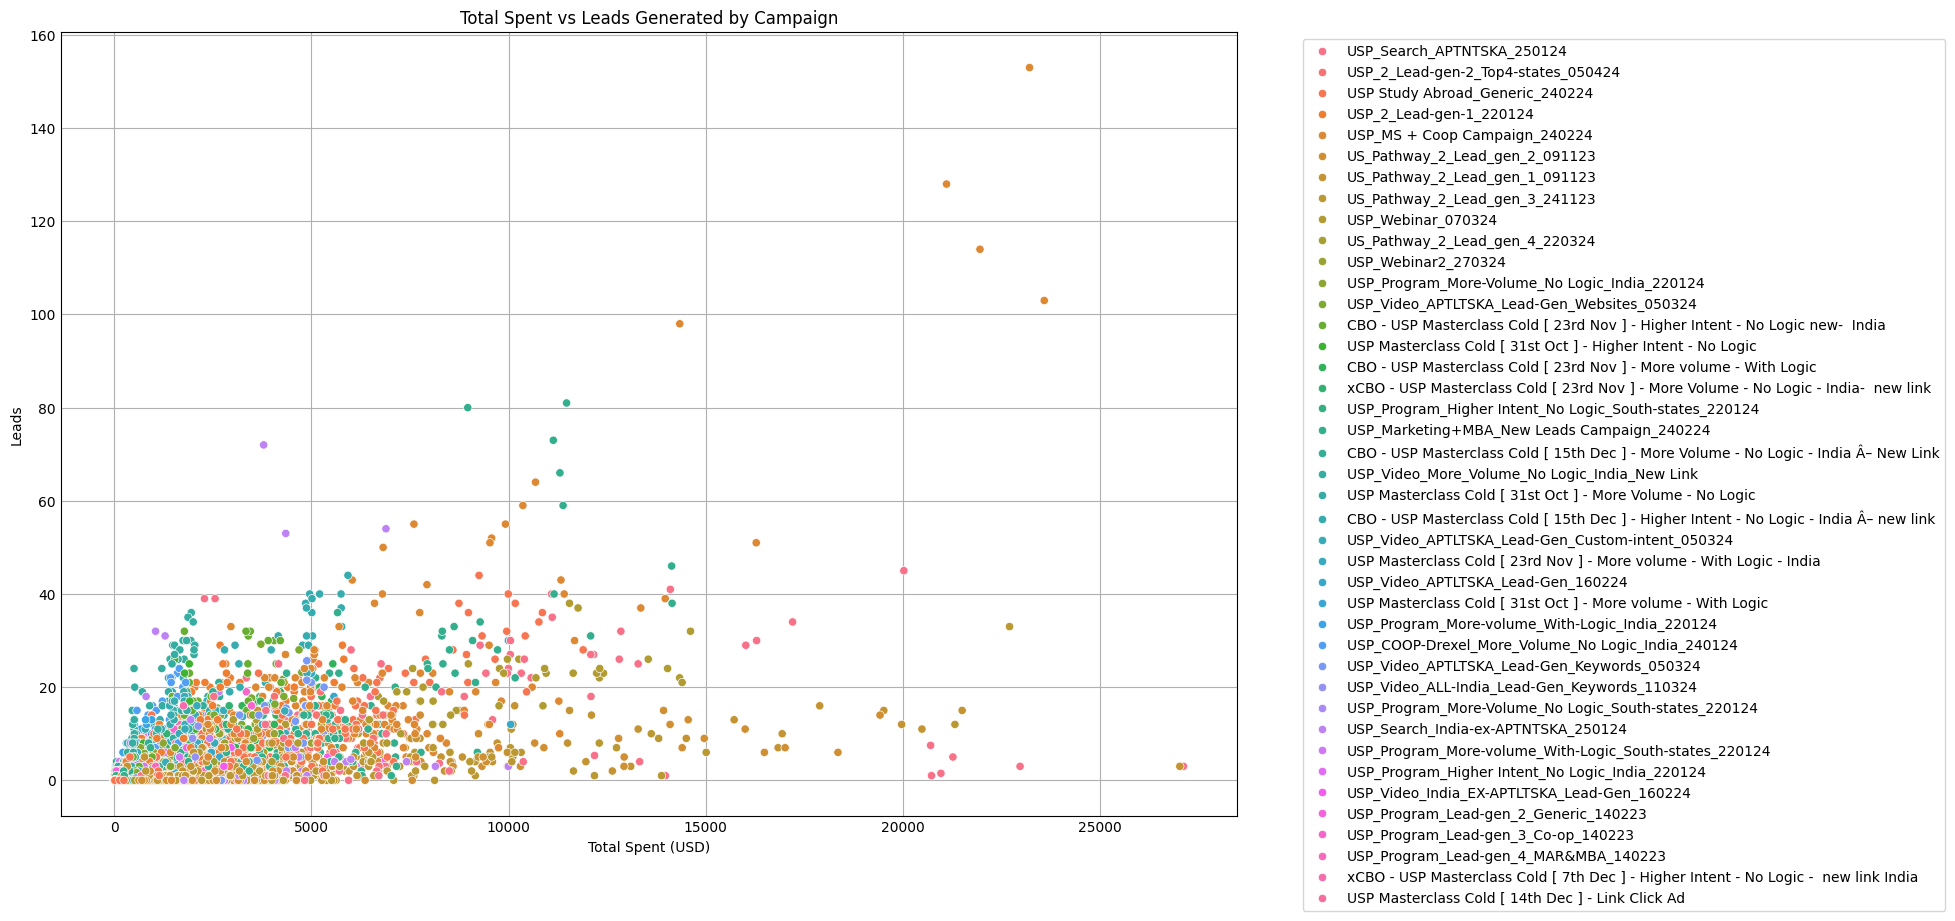

In [46]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='total_spent', y='leads', hue='campaign_name', data=data)
plt.title('Total Spent vs Leads Generated by Campaign')                            #ROI ANALYSIS
plt.xlabel('Total Spent (USD)')
plt.ylabel('Leads')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

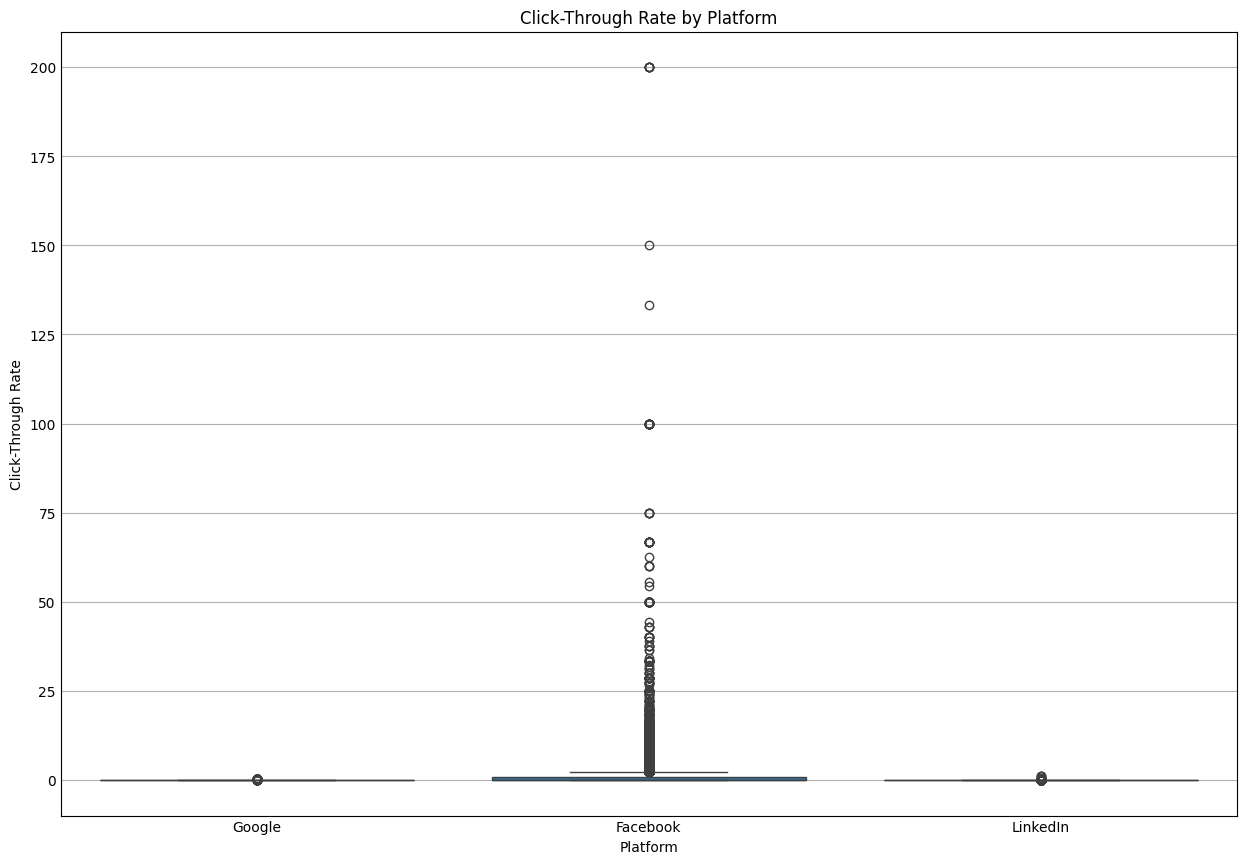

In [47]:
plt.figure(figsize=(12, 8))                                        #CAMPAIGN PERFORMANCE by click through rate
sns.boxplot(x='platform', y='click_through_rate', data=data)
plt.title('Click-Through Rate by Platform')
plt.xlabel('Platform')
plt.ylabel('Click-Through Rate')
plt.show()

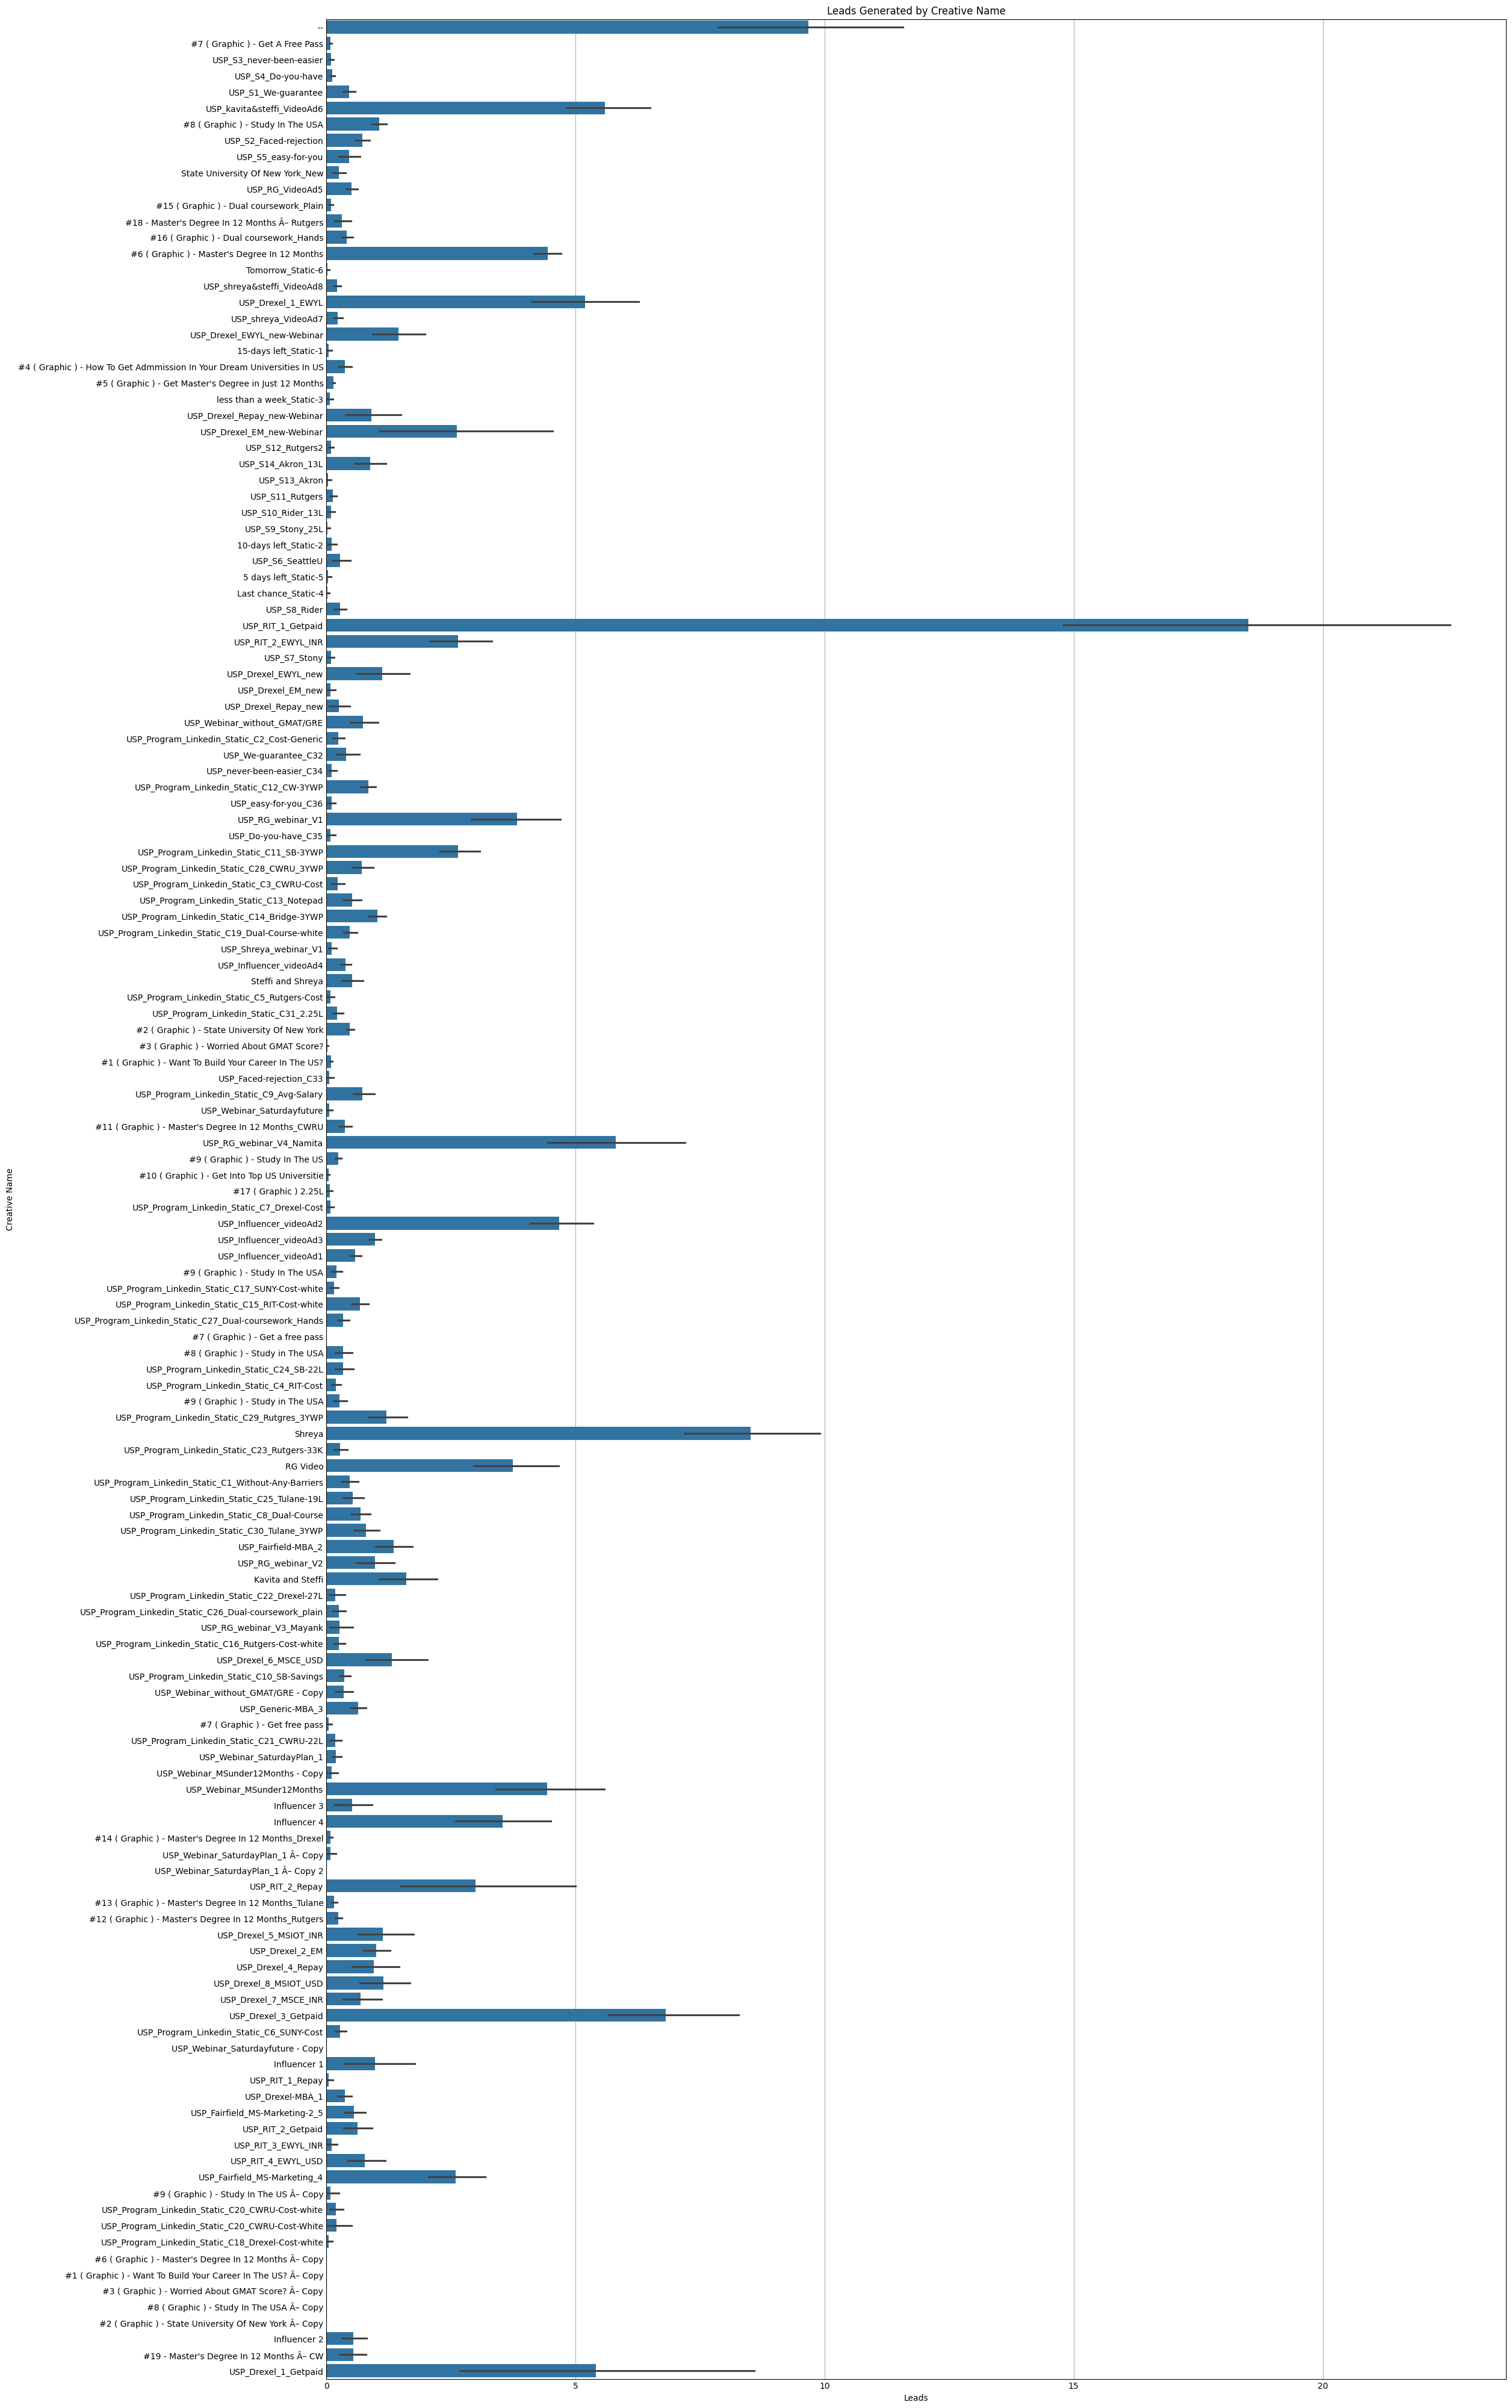

In [55]:
plt.figure(figsize=(20, 40))
sns.barplot(x='leads', y='creative_name', data=data)
plt.title('Leads Generated by Creative Name')
plt.xlabel('Leads')
plt.ylabel('Creative Name')
plt.show()

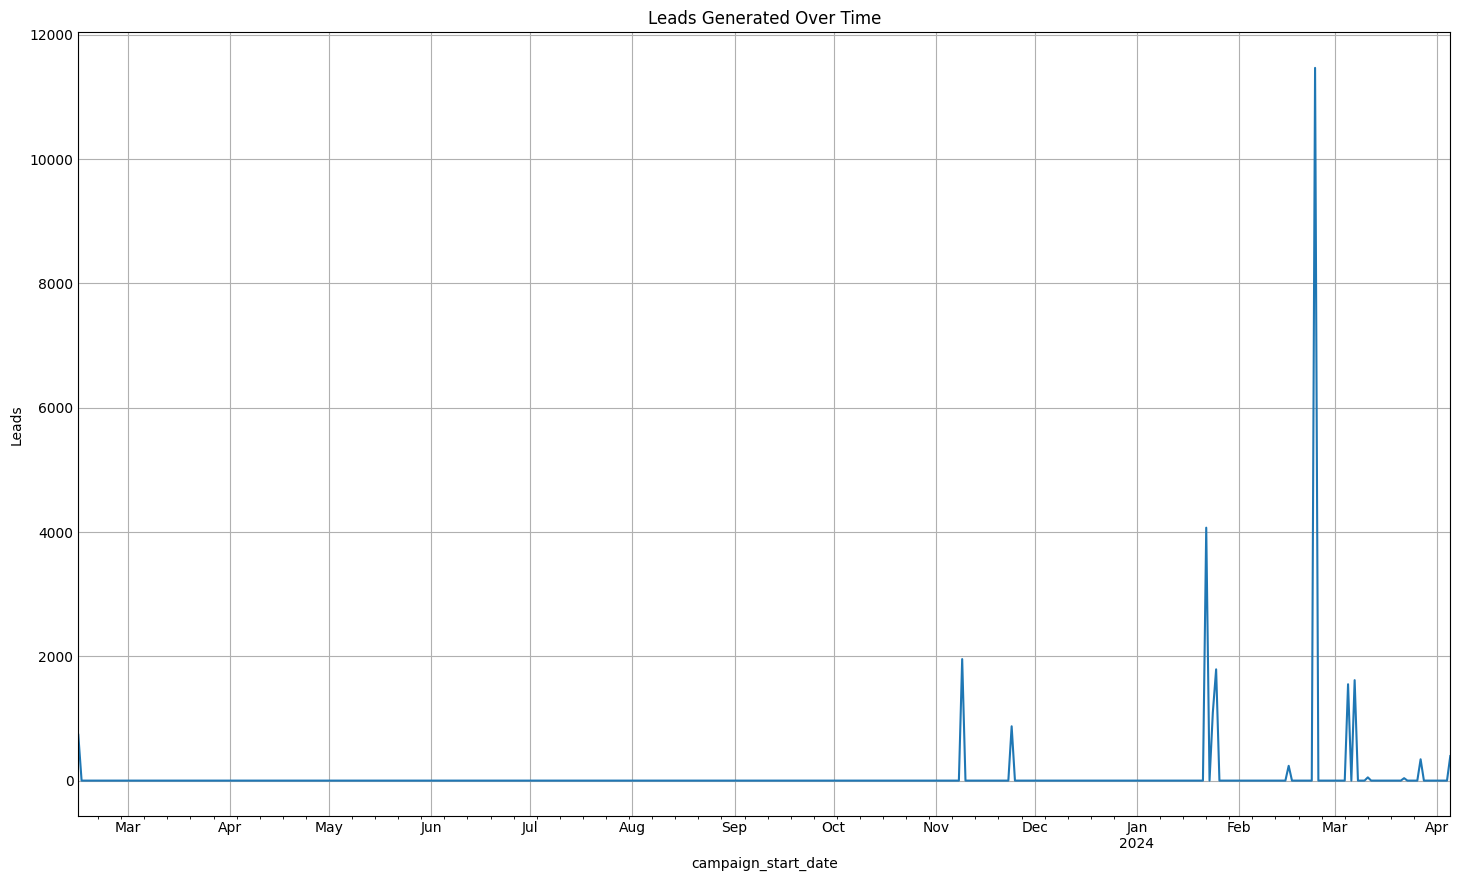

In [53]:
plt.figure(figsize=(14, 8))
data['campaign_start_date'] = pd.to_datetime(data['campaign_start_date'])
data.set_index('campaign_start_date', inplace=True)
data['leads'].resample('D').sum().plot()                                  #seasonal
plt.title('Leads Generated Over Time')
plt.xlabel('campaign_start_date')
plt.ylabel('Leads')
plt.show()